# Introduction
One of the greatest challenges for GGC students pursuing an IT degree is linking the classes offered by GGC to potential jobs. Because of this, upcoming graduates may not know what jobs to apply for according to their own skillset. To remedy this, Grizzly Insights will connect the coursework of each class to different job requirements over all the IT concentrations.

</br>**Goals**</br>
The goal of Grizzly Insights is to create a website that students can see which it skills is requred for different entry level jobs; students should also see which classes correspond to the previously mentioned it skills.This would allow students to use this website as a guideline to decide which classes to are the most important for them to take.

</br>**Problem Statement**</br>
In order to give the best guideline for upcoming IT graduates, our team must collect recent data that lists job titles, salaries, and related it skills accross four different concentrations.

In [237]:
#Placeholder for heading

# Data Collection
To keep the data relevant, our team requires data from the past year or so; the only way to get this type of data is to web scrape off of different job listing websites. 
<br>
**Webscraper** <br>
The webscaping method we used it the webscraping extension on google chrome:
<br>
https://chrome.google.com/webstore/detail/web-scraper-free-web-scra/jnhgnonknehpejjnehehllkliplmbmhn?hl=en 
<br>
For instructions on how to use this webscraper, our team followed this video: <br>
https://www.youtube.com/watch?v=aClnnoQK9G0
<br>
By following the previous video's instructions, our group scrapped data for the four concentrations across different job posting websites (simply hired and indeed), (which job website used for the different scrapes are in the name of the file ex: indeed_SofDev.csv) <br>
The main website we ended up using is Simply Hired: https://www.simplyhired.com/







In [238]:
#Placeholder for heading

# Data Importing and Data Cleaning
(so far) we have 5 different datafiles for 4 different concentrations; each file are ordered differently and the skill columns are a mess <br>
The mess in the job files include: <br>
1.   The multiple skills for each job maks the job information duplicate for each skill
2.   The salary may not be formatted correctly
3.   There might be null values
<br>



In [239]:
import pandas as pd
#Simply Hired:
DMsHDF = pd.read_csv("Digital Media Job Data.csv")
ESsHDF = pd.read_csv("Enterprise Systems Job Data.csv")
SDsHDF = pd.read_csv("Software Development Job Data.csv")
SASsHDF = pd.read_csv("Systems and Security Job Data.csv")
#Indeed:
DMIDF = pd.read_csv("indeed_DigitalMedia.csv")
ESIDF = pd.read_csv("indeed_ERPSystems.csv")
SDIDF = pd.read_csv("indeed_SofDev.csv")
SASIDF = pd.read_csv("indeed_CyberSec.csv")

###Simply Hired Dataset Sample:

In [240]:
DMsHDF

,job title,company name,location,salary,skills
0,Digital Media and Graphic Design Specialist,"Pennsylvania House of Representatives, Democra...","Harrisburg, PA","Estimated: $47,000 - $65,000 a year",PMP
1,Digital Media and Graphic Design Specialist,"Pennsylvania House of Representatives, Democra...","Harrisburg, PA","Estimated: $47,000 - $65,000 a year",Legislation
2,Digital Media and Graphic Design Specialist,"Pennsylvania House of Representatives, Democra...","Harrisburg, PA","Estimated: $47,000 - $65,000 a year",Assembly
3,Digital Media and Graphic Design Specialist,"Pennsylvania House of Representatives, Democra...","Harrisburg, PA","Estimated: $47,000 - $65,000 a year",Adobe Illustrator
4,Digital Media and Graphic Design Specialist,"Pennsylvania House of Representatives, Democra...","Harrisburg, PA","Estimated: $47,000 - $65,000 a year",Digital design
...,...,...,...,...,...
2918,Digital Media Specialist,"Spring Hills, LLC -",Remote,"Estimated: $53,000 - $71,000 a year",Microsoft Powerpoint
2919,Digital Media Specialist,"Spring Hills, LLC -",Remote,"Estimated: $53,000 - $71,000 a year",Adobe Photoshop
2920,Digital Media Specialist,"Spring Hills, LLC -",Remote,"Estimated: $53,000 - $71,000 a year",WordPress
2921,Digital Media Specialist,"Spring Hills, LLC -",Remote,"Estimated: $53,000 - $71,000 a year",Social media management


###Indeed Dataset Sample:

In [241]:
DMIDF

,job title,skills,salary
0,Social Media Specialist,Microsoft Project,NaN
1,Social Media Specialist,Marketing,NaN
2,Social Media Specialist,HTML5,NaN
3,Marketing Specialist,Adobe Creative Suite,NaN
4,Marketing Specialist,Adobe Acrobat,NaN
...,...,...,...
161,Social Media & Digital Advertising Specialist,Social media management,NaN
162,Social Media & Digital Advertising Specialist,Marketing,NaN
163,Social Media & Digital Advertising Specialist,Lead generation,NaN
164,Marketing Specialist,Marketing,NaN


##**Dealing with duplicate information:**
To deal with the duplicates is simple; we make the job title and skills into Hierarchical Indexes

In [242]:
def clean1(df):
    newDF = df.set_index(['job title', 'skills']).copy()
    #return newDF.stack()
    #newDF = new
    #return newDF.groupby(level='skills')
    return newDF

In [243]:
#Simply Hired:
DMsimplyHiredDF = clean1(DMsHDF).copy() # Digital Media from Simply Hired
ESsimplyHiredDF = clean1(ESsHDF).copy() # Enterprise Systems from Simply Hired
SDsimplyHiredDF = clean1(SDsHDF).copy() # Software Development from Simply Hired
SASsimplyHiredDF = clean1(SASsHDF).copy() # Systems and Security from Simply Hired
#Indeed:
DMIndeedDF = clean1(DMIDF).copy() # Digital Media from Indeed
ESIndeedDF = clean1(ESIDF).copy() # Enterprise Systems from Indeed
SDIndeedDF = clean1(SDIDF).copy() # Software Development from Indeed
SASIndeedDF = clean1(SASIDF).copy() # Systems and Security from Indeed

###Testing Each Simply Hired Dataset:

In [244]:
DMsimplyHiredDF

company name  \
job title                                   skills                                                                       
Digital Media and Graphic Design Specialist PMP                      Pennsylvania House of Representatives, Democra...   
                                            Legislation              Pennsylvania House of Representatives, Democra...   
                                            Assembly                 Pennsylvania House of Representatives, Democra...   
                                            Adobe Illustrator        Pennsylvania House of Representatives, Democra...   
                                            Digital design           Pennsylvania House of Representatives, Democra...   
...                                                                                                                ...   
Digital Media Specialist                    Microsoft Powerpoint                                   Spring Hills, LLC -   
                                            Adobe Photoshop                                        Spring Hills, LLC -   
                                            WordPress                                              Spring Hills, LLC -   
                                            Social media management                                Spring Hills, LLC -   
                                            Bachelor's degree                                      Spring Hills, LLC -   

                                                                           location  \
job title                                   skills                                    
Digital Media and Graphic Design Specialist PMP                      Harrisburg, PA   
                                            Legislation              Harrisburg, PA   
                                            Assembly                 Harrisburg, PA   
                                            Adobe Illustrator        Harrisburg, PA   
                                            Digital design           Harrisburg, PA   
...                                                                             ...   
Digital Media Specialist                    Microsoft Powerpoint             Remote   
                                            Adobe Photoshop                  Remote   
                                            WordPress                        Remote   
                                            Social media management          Remote   
                                            Bachelor's degree                Remote   

                                                                                                  salary  
job title                                   skills                                                        
Digital Media and Graphic Design Specialist PMP                      Estimated: $47,000 - $65,000 a year  
                                            Legislation              Estimated: $47,000 - $65,000 a year  
                                            Assembly                 Estimated: $47,000 - $65,000 a year  
                                            Adobe Illustrator        Estimated: $47,000 - $65,000 a year  
                                            Digital design           Estimated: $47,000 - $65,000 a year  
...                                                                                                  ...  
Digital Media Specialist                    Microsoft Powerpoint     Estimated: $53,000 - $71,000 a year  
                                            Adobe Photoshop          Estimated: $53,000 - $71,000 a year  
                                            WordPress                Estimated: $53,000 - $71,000 a year  
                                            Social media management  Estimated: $53,000 - $71,000 a year  
                                            Bachelor's degree        Estimated: $53,000 - $71,000 a yea

In [245]:
ESsimplyHiredDF

company name  \
job title                         skills                                                          
Senior Financial Analyst          Accounting            San Mateo County Transit District - 3.9   
                                  Power BI              San Mateo County Transit District - 3.9   
                                  Microsoft Excel       San Mateo County Transit District - 3.9   
                                  ERP systems           San Mateo County Transit District - 3.9   
                                  Microsoft Powerpoint  San Mateo County Transit District - 3.9   
...                                                                                         ...   
Business System Analyst (Spanish) ERP systems                                  Odoo, Inc. - 4.4   
                                  Communication skills                         Odoo, Inc. - 4.4   
                                  SaaS                                         Odoo, Inc. - 4.4   
                                  Bachelor's degree                            Odoo, Inc. - 4.4   
Business Analyst                  SyteLine                                          Datix - 1.3   

                                                                 location  \
job title                         skills                                    
Senior Financial Analyst          Accounting               San Carlos, CA   
                                  Power BI                 San Carlos, CA   
                                  Microsoft Excel          San Carlos, CA   
                                  ERP systems              San Carlos, CA   
                                  Microsoft Powerpoint     San Carlos, CA   
...                                                                   ...   
Business System Analyst (Spanish) ERP systems           San Francisco, CA   
                                  Communication skills  San Francisco, CA   
                                  SaaS                  San Francisco, CA   
                                  Bachelor's degree     San Francisco, CA   
Business Analyst                  SyteLine                         Remote   

                                                                                      salary  
job title                         skills                                                      
Senior Financial Analyst          Accounting            Estimated: $97,000 - $140,000 a year  
                                  Power BI              Estimated: $97,000 - $140,000 a year  
                                  Microsoft Excel       Estimated: $97,000 - $140,000 a year  
                                  ERP systems           Estimated: $97,000 - $140,000 a year  
                                  Microsoft Powerpoint  Estimated: $97,000 - $140,000 a year  
...                                                                                      ...  
Business System Analyst (Spanish) ERP systems                       $70,000 - $95,000 a year  
                                  Communication skills              $70,000 - $95,000 a year  
                                  SaaS                              $70,000 - $95,000 a year  
                                  Bachelor's degree                 $70,000 - $95,000 a year  
Business Analyst                  SyteLine               Estimated: $70,000 - $92,000 a year  

[2891 rows x 3 columns]

In [246]:
SDsimplyHiredDF

company name  \
job title                                        skills                                                     
Junior Azure Solutions Architect/DevOps Engineer Auto estimating                        Idea Entity - 3.8   
                                                 Construction estimating                Idea Entity - 3.8   
                                                 Full-stack development                 Idea Entity - 3.8   
                                                 Azure                                  Idea Entity - 3.8   
                                                 IAT                                    Idea Entity - 3.8   
...                                                                                                   ...   
Software Developer                               Operating systems        MSC Industrial Supply Co. - 3.4   
                                                 CSS                      MSC Industrial Supply Co. - 3.4   
                                                 SQL                      MSC Industrial Supply Co. - 3.4   
                                                 Swift                    MSC Industrial Supply Co. - 3.4   
                                                 Driver's License         MSC Industrial Supply Co. - 3.4   

                                                                                location  \
job title                                        skills                                    
Junior Azure Solutions Architect/DevOps Engineer Auto estimating              Peoria, IL   
                                                 Construction estimating      Peoria, IL   
                                                 Full-stack development       Peoria, IL   
                                                 Azure                        Peoria, IL   
                                                 IAT                          Peoria, IL   
...                                                                                  ...   
Software Developer                               Operating systems        North Carolina   
                                                 CSS                      North Carolina   
                                                 SQL                      North Carolina   
                                                 Swift                    North Carolina   
                                                 Driver's License         North Carolina   

                                                                                                        salary  
job title                                        skills                                                         
Junior Azure Solutions Architect/DevOps Engineer Auto estimating          Estimated: $74,000 - $100,000 a year  
                                                 Construction estimating  Estimated: $74,000 - $100,000 a year  
                                                 Full-stack development   Estimated: $74,000 - $100,000 a year  
                                                 Azure                    Estimated: $74,000 - $100,000 a year  
                                                 IAT                      Estimated: $74,000 - $100,000 a year  
...                                                                                                        ...  
Software Developer                               Operating systems         Estimated: $74,000 - $94,000 a year  
                                                 CSS                       Estimated: $74,000 - $94,000 a year  
                                                 SQL                       Estimated: $74,000 - $94,000 a year  
                                                 Swift                     Estimated: $74,000 - $94,000 a year  
                                                 Driver's License          Estimated: $74,000 - $94,000 a year  

[4719 ro

In [247]:
SASsimplyHiredDF

company name  \
job title                     skills                                                                  
NaN                           NaN                                                               NaN   
Senior Cybersecurity Engineer J2EE                                                       Visa - 3.9   
                              NoSQL                                                      Visa - 3.9   
                              Spring Boot                                                Visa - 3.9   
                              DevOps                                                     Visa - 3.9   
...                                                                                             ...   
Security Analyst (Tier III)   Vulnerability management  By Light Professional IT Services LLC - 3.7   
                              Azure                     By Light Professional IT Services LLC - 3.7   
                              IDS                       By Light Professional IT Services LLC - 3.7   
                              Bachelor of Science       By Light Professional IT Services LLC - 3.7   
                              Bachelor's degree         By Light Professional IT Services LLC - 3.7   

                                                          location  \
job title                     skills                                 
NaN                           NaN                              NaN   
Senior Cybersecurity Engineer J2EE                      Austin, TX   
                              NoSQL                     Austin, TX   
                              Spring Boot               Austin, TX   
                              DevOps                    Austin, TX   
...                                                            ...   
Security Analyst (Tier III)   Vulnerability management      Remote   
                              Azure                         Remote   
                              IDS                           Remote   
                              Bachelor of Science           Remote   
                              Bachelor's degree             Remote   

                                                                                       salary  
job title                     skills                                                           
NaN                           NaN                                                         NaN  
Senior Cybersecurity Engineer J2EE                      Estimated: $110,000 - $160,000 a year  
                              NoSQL                     Estimated: $110,000 - $160,000 a year  
                              Spring Boot               Estimated: $110,000 - $160,000 a year  
                              DevOps                    Estimated: $110,000 - $160,000 a year  
...                                                                                       ...  
Security Analyst (Tier III)   Vulnerability management   Estimated: $91,000 - $130,000 a year  
                              Azure                      Estimated: $91,000 - $130,000 a year  
                              IDS                        Estimated: $91,000 - $130,000 a year  
                              Bachelor of Science        Estimated: $91,000 - $130,000 a year  
                              Bachelor's degree          Estimated: $91,000 - $130,000 a year  

[4889 rows x 3 columns]

###Testing Each Simply Hired Dataset:

In [248]:
DMIndeedDF

salary
job title                                     skills                        
Social Media Specialist                       Microsoft Project          NaN
                                              Marketing                  NaN
                                              HTML5                      NaN
Marketing Specialist                          Adobe Creative Suite       NaN
                                              Adobe Acrobat              NaN
...                                                                      ...
Social Media & Digital Advertising Specialist Social media management    NaN
                                              Marketing                  NaN
                                              Lead generation            NaN
Marketing Specialist                          Marketing                  NaN
                                              Project management         NaN

[166 rows x 1 columns]

In [249]:
ESIndeedDF

,,salary
job title,skills,
"HOSE TECHNICIAN - Lafayette, LA",NaN,$16 - $20 an hour
Account Specialist,NaN,NaN
Material Handler,ERP systemsmissing qualification,NaN
Manufacturing Specialist,NaN,NaN
Quality Inspection Associate,NaN,NaN
Picker/Packer 3rd Shift $15.50 an hour,NaN,$15.50 - $16.00 an hour
Press Operator,NaN,$16.50 - $18.50 an hour
Database Administrator (Systems/Network Analyst 2),NaN,"$3,553 - $5,240 a month"
2nd Shift Assembler,Manufacturingmissing qualification,$16.50 - $17.25 an hour


In [250]:
SDIndeedDF

salary
job title                                          skills                                
Graduate Scientific Programmer - School of Biom... Research                           NaN
                                                   .NET                               NaN
                                                   Java                               NaN
Full Stack Developer                               ERP systems                        NaN
Android Mobile Reverse Engineer: Entry/Junior L... Assembly                           NaN
...                                                                                   ...
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC         $70,000 - $100,000 a year
                                                   AI           $70,000 - $100,000 a year
IT Development Program - Software Engineering 2... Java                               NaN
                                                   Python                             NaN
                                                   IT                                 NaN

[181 rows x 1 columns]

In [251]:
SASIndeedDF

salary
job title                                          skills                                         
IT Audit Staff Consultant                          PCI                                         NaN
                                                   Accounting                                  NaN
                                                   IT                                          NaN
                                                   Information security                        NaN
Entry-Level Cybersecurity Consultant: 2023         SIEM                  $60,000 - $178,000 a year
...                                                                                            ...
Satellite Network Operation Monitoring and Cont... LAN                      $7.25 - $24.81 an hour
Identity Management Analyst                        SharePoint                     Monday to Friday
                                                   Remedy                         Monday to Friday
                                                   Data collection                Monday to Friday
Cyber Operations Specialist                        NaN                        Up to $25,000 a year

[70 rows x 1 columns]

##**Dealing with unformatted salary:** The salary is seperated into low vs high, so there should be two seperate columns for min_Salary and one for max_Salary

In [252]:
def formatSalary(df):
    df['formatted salary'] = df['salary'].str.replace(',', '').copy()
    df['formatted salary'] = df['formatted salary'].str.replace('Estimated: ', '').copy()
    df['formatted salary'] = df['formatted salary'].str.replace(' a year', '').copy()
    df['formatted salary'] = df['formatted salary'].str.replace('$', '').copy()
    df['formatted salary'] = df['formatted salary'].str.replace(' an hour', '').copy()
    return df['formatted salary']

In [253]:
def minMaxSalary(df):
    df['formatted salary'] = formatSalary(df).copy()
    salaryList = (df['formatted salary'].str.split('-',n = 1, expand = True)).copy()
    df = pd.concat([df, salaryList], axis=1).copy()
    df = df.rename(columns={0: 'Min Salary', 1: 'Max Salary'}).drop(['formatted salary'], axis = 1)
    return df

In [254]:
#Simply Hired
DMsimplyHiredDF = minMaxSalary(DMsimplyHiredDF).copy()
ESsimplyHiredDF = minMaxSalary(ESsimplyHiredDF).copy()
SDsimplyHiredDF = minMaxSalary(SDsimplyHiredDF).copy()
SASsimplyHiredDF = minMaxSalary(SASsimplyHiredDF).copy()
#Indeed
DMIndeedDF = minMaxSalary(DMIndeedDF).copy()
ESIndeedDF = minMaxSalary(ESIndeedDF).copy()
SDIndeedDF = minMaxSalary(SDIndeedDF).copy()
SASIndeedDF = minMaxSalary(SASIndeedDF).copy()

<ipython-input-252-414c38c9c6e5>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['formatted salary'] = df['formatted salary'].str.replace('$', '').copy()
<ipython-input-252-414c38c9c6e5>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['formatted salary'] = df['formatted salary'].str.replace('$', '').copy()
<ipython-input-252-414c38c9c6e5>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['formatted salary'] = df['formatted salary'].str.replace('$', '').copy()
<ipython-input-252-414c38c9c6e5>:5: FutureWarning: T

###Simply Hired Datasets:

In [255]:
DMsimplyHiredDF

company name  \
job title                                   skills                                                                       
Digital Media and Graphic Design Specialist PMP                      Pennsylvania House of Representatives, Democra...   
                                            Legislation              Pennsylvania House of Representatives, Democra...   
                                            Assembly                 Pennsylvania House of Representatives, Democra...   
                                            Adobe Illustrator        Pennsylvania House of Representatives, Democra...   
                                            Digital design           Pennsylvania House of Representatives, Democra...   
...                                                                                                                ...   
Digital Media Specialist                    Microsoft Powerpoint                                   Spring Hills, LLC -   
                                            Adobe Photoshop                                        Spring Hills, LLC -   
                                            WordPress                                              Spring Hills, LLC -   
                                            Social media management                                Spring Hills, LLC -   
                                            Bachelor's degree                                      Spring Hills, LLC -   

                                                                           location  \
job title                                   skills                                    
Digital Media and Graphic Design Specialist PMP                      Harrisburg, PA   
                                            Legislation              Harrisburg, PA   
                                            Assembly                 Harrisburg, PA   
                                            Adobe Illustrator        Harrisburg, PA   
                                            Digital design           Harrisburg, PA   
...                                                                             ...   
Digital Media Specialist                    Microsoft Powerpoint             Remote   
                                            Adobe Photoshop                  Remote   
                                            WordPress                        Remote   
                                            Social media management          Remote   
                                            Bachelor's degree                Remote   

                                                                                                  salary  \
job title                                   skills                                                         
Digital Media and Graphic Design Specialist PMP                      Estimated: $47,000 - $65,000 a year   
                                            Legislation              Estimated: $47,000 - $65,000 a year   
                                            Assembly                 Estimated: $47,000 - $65,000 a year   
                                            Adobe Illustrator        Estimated: $47,000 - $65,000 a year   
                                            Digital design           Estimated: $47,000 - $65,000 a year   
...                                                                                                  ...   
Digital Media Specialist                    Microsoft Powerpoint     Estimated: $53,000 - $71,000 a year   
                                            Adobe Photoshop          Estimated: $53,000 - $71,000 a year   
                                            WordPress                Estimated: $53,000 - $71,000 a year   
                                            Social media management  Estimated: $53,000 - $71,000 a year   
                                            Bachelor's degree        Estimated: $53,000 - $

In [256]:
ESsimplyHiredDF

company name  \
job title                         skills                                                          
Senior Financial Analyst          Accounting            San Mateo County Transit District - 3.9   
                                  Power BI              San Mateo County Transit District - 3.9   
                                  Microsoft Excel       San Mateo County Transit District - 3.9   
                                  ERP systems           San Mateo County Transit District - 3.9   
                                  Microsoft Powerpoint  San Mateo County Transit District - 3.9   
...                                                                                         ...   
Business System Analyst (Spanish) ERP systems                                  Odoo, Inc. - 4.4   
                                  Communication skills                         Odoo, Inc. - 4.4   
                                  SaaS                                         Odoo, Inc. - 4.4   
                                  Bachelor's degree                            Odoo, Inc. - 4.4   
Business Analyst                  SyteLine                                          Datix - 1.3   

                                                                 location  \
job title                         skills                                    
Senior Financial Analyst          Accounting               San Carlos, CA   
                                  Power BI                 San Carlos, CA   
                                  Microsoft Excel          San Carlos, CA   
                                  ERP systems              San Carlos, CA   
                                  Microsoft Powerpoint     San Carlos, CA   
...                                                                   ...   
Business System Analyst (Spanish) ERP systems           San Francisco, CA   
                                  Communication skills  San Francisco, CA   
                                  SaaS                  San Francisco, CA   
                                  Bachelor's degree     San Francisco, CA   
Business Analyst                  SyteLine                         Remote   

                                                                                      salary  \
job title                         skills                                                       
Senior Financial Analyst          Accounting            Estimated: $97,000 - $140,000 a year   
                                  Power BI              Estimated: $97,000 - $140,000 a year   
                                  Microsoft Excel       Estimated: $97,000 - $140,000 a year   
                                  ERP systems           Estimated: $97,000 - $140,000 a year   
                                  Microsoft Powerpoint  Estimated: $97,000 - $140,000 a year   
...                                                                                      ...   
Business System Analyst (Spanish) ERP systems                       $70,000 - $95,000 a year   
                                  Communication skills              $70,000 - $95,000 a year   
                                  SaaS                              $70,000 - $95,000 a year   
                                  Bachelor's degree                 $70,000 - $95,000 a year   
Business Analyst                  SyteLine               Estimated: $70,000 - $92,000 a year   

                                                       Min Salary Max Salary  
job title                         skills                                      
Senior Financial Analyst          Accounting               97000      140000  
                                  Power BI                 97000      140000  
                                  Microsoft Excel          97000      140000  
                                  ERP systems              97000      140000  
                                  Microsoft Powerpoint     97000      

In [257]:
SDsimplyHiredDF

company name  \
job title                                        skills                                                     
Junior Azure Solutions Architect/DevOps Engineer Auto estimating                        Idea Entity - 3.8   
                                                 Construction estimating                Idea Entity - 3.8   
                                                 Full-stack development                 Idea Entity - 3.8   
                                                 Azure                                  Idea Entity - 3.8   
                                                 IAT                                    Idea Entity - 3.8   
...                                                                                                   ...   
Software Developer                               Operating systems        MSC Industrial Supply Co. - 3.4   
                                                 CSS                      MSC Industrial Supply Co. - 3.4   
                                                 SQL                      MSC Industrial Supply Co. - 3.4   
                                                 Swift                    MSC Industrial Supply Co. - 3.4   
                                                 Driver's License         MSC Industrial Supply Co. - 3.4   

                                                                                location  \
job title                                        skills                                    
Junior Azure Solutions Architect/DevOps Engineer Auto estimating              Peoria, IL   
                                                 Construction estimating      Peoria, IL   
                                                 Full-stack development       Peoria, IL   
                                                 Azure                        Peoria, IL   
                                                 IAT                          Peoria, IL   
...                                                                                  ...   
Software Developer                               Operating systems        North Carolina   
                                                 CSS                      North Carolina   
                                                 SQL                      North Carolina   
                                                 Swift                    North Carolina   
                                                 Driver's License         North Carolina   

                                                                                                        salary  \
job title                                        skills                                                          
Junior Azure Solutions Architect/DevOps Engineer Auto estimating          Estimated: $74,000 - $100,000 a year   
                                                 Construction estimating  Estimated: $74,000 - $100,000 a year   
                                                 Full-stack development   Estimated: $74,000 - $100,000 a year   
                                                 Azure                    Estimated: $74,000 - $100,000 a year   
                                                 IAT                      Estimated: $74,000 - $100,000 a year   
...                                                                                                        ...   
Software Developer                               Operating systems         Estimated: $74,000 - $94,000 a year   
                                                 CSS                       Estimated: $74,000 - $94,000 a year   
                                                 SQL                       Estimated: $74,000 - $94,000 a year   
                                                 Swift                     Estimated: $74,000 - $94,000 a year   
                                                 Driver's License          Estimated: $74,000 - $94,000 a year

In [258]:
SASsimplyHiredDF

company name  \
job title                     skills                                                                  
NaN                           NaN                                                               NaN   
Senior Cybersecurity Engineer J2EE                                                       Visa - 3.9   
                              NoSQL                                                      Visa - 3.9   
                              Spring Boot                                                Visa - 3.9   
                              DevOps                                                     Visa - 3.9   
...                                                                                             ...   
Security Analyst (Tier III)   Vulnerability management  By Light Professional IT Services LLC - 3.7   
                              Azure                     By Light Professional IT Services LLC - 3.7   
                              IDS                       By Light Professional IT Services LLC - 3.7   
                              Bachelor of Science       By Light Professional IT Services LLC - 3.7   
                              Bachelor's degree         By Light Professional IT Services LLC - 3.7   

                                                          location  \
job title                     skills                                 
NaN                           NaN                              NaN   
Senior Cybersecurity Engineer J2EE                      Austin, TX   
                              NoSQL                     Austin, TX   
                              Spring Boot               Austin, TX   
                              DevOps                    Austin, TX   
...                                                            ...   
Security Analyst (Tier III)   Vulnerability management      Remote   
                              Azure                         Remote   
                              IDS                           Remote   
                              Bachelor of Science           Remote   
                              Bachelor's degree             Remote   

                                                                                       salary  \
job title                     skills                                                            
NaN                           NaN                                                         NaN   
Senior Cybersecurity Engineer J2EE                      Estimated: $110,000 - $160,000 a year   
                              NoSQL                     Estimated: $110,000 - $160,000 a year   
                              Spring Boot               Estimated: $110,000 - $160,000 a year   
                              DevOps                    Estimated: $110,000 - $160,000 a year   
...                                                                                       ...   
Security Analyst (Tier III)   Vulnerability management   Estimated: $91,000 - $130,000 a year   
                              Azure                      Estimated: $91,000 - $130,000 a year   
                              IDS                        Estimated: $91,000 - $130,000 a year   
                              Bachelor of Science        Estimated: $91,000 - $130,000 a year   
                              Bachelor's degree          Estimated: $91,000 - $130,000 a year   

                                                       Min Salary Max Salary  
job title                     skills                                          
NaN                           NaN                             NaN        NaN  
Senior Cybersecurity Engineer J2EE                        110000      160000  
                              NoSQL                       110000      160000  
                              Spring Boot                 110000      160000  
                              DevOps                      110000      160000  
...                  

###Indeed Datasets

In [259]:
DMIndeedDF

salary  \
job title                                     skills                           
Social Media Specialist                       Microsoft Project          NaN   
                                              Marketing                  NaN   
                                              HTML5                      NaN   
Marketing Specialist                          Adobe Creative Suite       NaN   
                                              Adobe Acrobat              NaN   
...                                                                      ...   
Social Media & Digital Advertising Specialist Social media management    NaN   
                                              Marketing                  NaN   
                                              Lead generation            NaN   
Marketing Specialist                          Marketing                  NaN   
                                              Project management         NaN   

                                                                      Min Salary  \
job title                                     skills                               
Social Media Specialist                       Microsoft Project              NaN   
                                              Marketing                      NaN   
                                              HTML5                          NaN   
Marketing Specialist                          Adobe Creative Suite           NaN   
                                              Adobe Acrobat                  NaN   
...                                                                          ...   
Social Media & Digital Advertising Specialist Social media management        NaN   
                                              Marketing                      NaN   
                                              Lead generation                NaN   
Marketing Specialist                          Marketing                      NaN   
                                              Project management             NaN   

                                                                      Max Salary  
job title                                     skills                              
Social Media Specialist                       Microsoft Project              NaN  
                                              Marketing                      NaN  
                                              HTML5                          NaN  
Marketing Specialist                          Adobe Creative Suite           NaN  
                                              Adobe Acrobat                  NaN  
...                                                                          ...  
Social Media & Digital Advertising Specialist Social media management        NaN  
                                              Marketing                      NaN  
                                              Lead generation                NaN  
Marketing Specialist                          Marketing                      NaN  
                                              Project management             NaN  

[166 rows x 3 columns]

In [260]:
ESIndeedDF

,,salary,Min Salary,Max Salary
job title,skills,,,
"HOSE TECHNICIAN - Lafayette, LA",NaN,$16 - $20 an hour,16,20
Account Specialist,NaN,NaN,NaN,NaN
Material Handler,ERP systemsmissing qualification,NaN,NaN,NaN
Manufacturing Specialist,NaN,NaN,NaN,NaN
Quality Inspection Associate,NaN,NaN,NaN,NaN
Picker/Packer 3rd Shift $15.50 an hour,NaN,$15.50 - $16.00 an hour,15.50,16.00
Press Operator,NaN,$16.50 - $18.50 an hour,16.50,18.50
Database Administrator (Systems/Network Analyst 2),NaN,"$3,553 - $5,240 a month",3553,5240 a month
2nd Shift Assembler,Manufacturingmissing qualification,$16.50 - $17.25 an hour,16.50,17.25


In [261]:
SDIndeedDF

salary  \
job title                                          skills                                   
Graduate Scientific Programmer - School of Biom... Research                           NaN   
                                                   .NET                               NaN   
                                                   Java                               NaN   
Full Stack Developer                               ERP systems                        NaN   
Android Mobile Reverse Engineer: Entry/Junior L... Assembly                           NaN   
...                                                                                   ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC         $70,000 - $100,000 a year   
                                                   AI           $70,000 - $100,000 a year   
IT Development Program - Software Engineering 2... Java                               NaN   
                                                   Python                             NaN   
                                                   IT                                 NaN   

                                                               Min Salary  \
job title                                          skills                   
Graduate Scientific Programmer - School of Biom... Research           NaN   
                                                   .NET               NaN   
                                                   Java               NaN   
Full Stack Developer                               ERP systems        NaN   
Android Mobile Reverse Engineer: Entry/Junior L... Assembly           NaN   
...                                                                   ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC            70000    
                                                   AI              70000    
IT Development Program - Software Engineering 2... Java               NaN   
                                                   Python             NaN   
                                                   IT                 NaN   

                                                               Max Salary  
job title                                          skills                  
Graduate Scientific Programmer - School of Biom... Research           NaN  
                                                   .NET               NaN  
                                                   Java               NaN  
Full Stack Developer                               ERP systems        NaN  
Android Mobile Reverse Engineer: Entry/Junior L... Assembly           NaN  
...                                                                   ...  
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC            100000  
                                                   AI              100000  
IT Development Program - Software Engineering 2... Java               NaN  
                                                   Python             NaN  
                                                   IT                 NaN  

[181 rows x 3 columns]

In [262]:
SASIndeedDF

salary  \
job title                                          skills                                            
IT Audit Staff Consultant                          PCI                                         NaN   
                                                   Accounting                                  NaN   
                                                   IT                                          NaN   
                                                   Information security                        NaN   
Entry-Level Cybersecurity Consultant: 2023         SIEM                  $60,000 - $178,000 a year   
...                                                                                            ...   
Satellite Network Operation Monitoring and Cont... LAN                      $7.25 - $24.81 an hour   
Identity Management Analyst                        SharePoint                     Monday to Friday   
                                                   Remedy                         Monday to Friday   
                                                   Data collection                Monday to Friday   
Cyber Operations Specialist                        NaN                        Up to $25,000 a year   

                                                                               Min Salary  \
job title                                          skills                                   
IT Audit Staff Consultant                          PCI                                NaN   
                                                   Accounting                         NaN   
                                                   IT                                 NaN   
                                                   Information security               NaN   
Entry-Level Cybersecurity Consultant: 2023         SIEM                            60000    
...                                                                                   ...   
Satellite Network Operation Monitoring and Cont... LAN                              7.25    
Identity Management Analyst                        SharePoint            Monday to Friday   
                                                   Remedy                Monday to Friday   
                                                   Data collection       Monday to Friday   
Cyber Operations Specialist                        NaN                        Up to 25000   

                                                                        Max Salary  
job title                                          skills                           
IT Audit Staff Consultant                          PCI                         NaN  
                                                   Accounting                  NaN  
                                                   IT                          NaN  
                                                   Information security        NaN  
Entry-Level Cybersecurity Consultant: 2023         SIEM                     178000  
...                                                                            ...  
Satellite Network Operation Monitoring and Cont... LAN                       24.81  
Identity Management Analyst                        SharePoint                 None  
                                                   Remedy                     None  
                                                   Data collection            None  
Cyber Operations Specialist                        NaN                        None  

[70 rows x 3 columns]

##**Dealing with null values:** 
Because most of the null values are in the salary; the null values are replaced with zero (not dropped because our analysis cares more about the job skills than salary)

In [263]:
#Simply Hired
DMsimplyHiredDF = DMsimplyHiredDF.fillna(0)
ESsimplyHiredDF = ESsimplyHiredDF.fillna(0)
SDsimplyHiredDF = SDsimplyHiredDF.fillna(0)
SASsimplyHiredDF = SASsimplyHiredDF.fillna(0)
#Indeed
DMIndeedDF = DMIndeedDF.fillna(0)
ESIndeedDF = ESIndeedDF.fillna(0)
SDIndeedDF = SDIndeedDF.fillna(0)
SASIndeedDF = SASIndeedDF.fillna(0)

###Simply Hired

In [264]:
DMsimplyHiredDF

company name  \
job title                                   skills                                                                       
Digital Media and Graphic Design Specialist PMP                      Pennsylvania House of Representatives, Democra...   
                                            Legislation              Pennsylvania House of Representatives, Democra...   
                                            Assembly                 Pennsylvania House of Representatives, Democra...   
                                            Adobe Illustrator        Pennsylvania House of Representatives, Democra...   
                                            Digital design           Pennsylvania House of Representatives, Democra...   
...                                                                                                                ...   
Digital Media Specialist                    Microsoft Powerpoint                                   Spring Hills, LLC -   
                                            Adobe Photoshop                                        Spring Hills, LLC -   
                                            WordPress                                              Spring Hills, LLC -   
                                            Social media management                                Spring Hills, LLC -   
                                            Bachelor's degree                                      Spring Hills, LLC -   

                                                                           location  \
job title                                   skills                                    
Digital Media and Graphic Design Specialist PMP                      Harrisburg, PA   
                                            Legislation              Harrisburg, PA   
                                            Assembly                 Harrisburg, PA   
                                            Adobe Illustrator        Harrisburg, PA   
                                            Digital design           Harrisburg, PA   
...                                                                             ...   
Digital Media Specialist                    Microsoft Powerpoint             Remote   
                                            Adobe Photoshop                  Remote   
                                            WordPress                        Remote   
                                            Social media management          Remote   
                                            Bachelor's degree                Remote   

                                                                                                  salary  \
job title                                   skills                                                         
Digital Media and Graphic Design Specialist PMP                      Estimated: $47,000 - $65,000 a year   
                                            Legislation              Estimated: $47,000 - $65,000 a year   
                                            Assembly                 Estimated: $47,000 - $65,000 a year   
                                            Adobe Illustrator        Estimated: $47,000 - $65,000 a year   
                                            Digital design           Estimated: $47,000 - $65,000 a year   
...                                                                                                  ...   
Digital Media Specialist                    Microsoft Powerpoint     Estimated: $53,000 - $71,000 a year   
                                            Adobe Photoshop          Estimated: $53,000 - $71,000 a year   
                                            WordPress                Estimated: $53,000 - $71,000 a year   
                                            Social media management  Estimated: $53,000 - $71,000 a year   
                                            Bachelor's degree        Estimated: $53,000 - $

In [265]:
ESsimplyHiredDF

company name  \
job title                         skills                                                          
Senior Financial Analyst          Accounting            San Mateo County Transit District - 3.9   
                                  Power BI              San Mateo County Transit District - 3.9   
                                  Microsoft Excel       San Mateo County Transit District - 3.9   
                                  ERP systems           San Mateo County Transit District - 3.9   
                                  Microsoft Powerpoint  San Mateo County Transit District - 3.9   
...                                                                                         ...   
Business System Analyst (Spanish) ERP systems                                  Odoo, Inc. - 4.4   
                                  Communication skills                         Odoo, Inc. - 4.4   
                                  SaaS                                         Odoo, Inc. - 4.4   
                                  Bachelor's degree                            Odoo, Inc. - 4.4   
Business Analyst                  SyteLine                                          Datix - 1.3   

                                                                 location  \
job title                         skills                                    
Senior Financial Analyst          Accounting               San Carlos, CA   
                                  Power BI                 San Carlos, CA   
                                  Microsoft Excel          San Carlos, CA   
                                  ERP systems              San Carlos, CA   
                                  Microsoft Powerpoint     San Carlos, CA   
...                                                                   ...   
Business System Analyst (Spanish) ERP systems           San Francisco, CA   
                                  Communication skills  San Francisco, CA   
                                  SaaS                  San Francisco, CA   
                                  Bachelor's degree     San Francisco, CA   
Business Analyst                  SyteLine                         Remote   

                                                                                      salary  \
job title                         skills                                                       
Senior Financial Analyst          Accounting            Estimated: $97,000 - $140,000 a year   
                                  Power BI              Estimated: $97,000 - $140,000 a year   
                                  Microsoft Excel       Estimated: $97,000 - $140,000 a year   
                                  ERP systems           Estimated: $97,000 - $140,000 a year   
                                  Microsoft Powerpoint  Estimated: $97,000 - $140,000 a year   
...                                                                                      ...   
Business System Analyst (Spanish) ERP systems                       $70,000 - $95,000 a year   
                                  Communication skills              $70,000 - $95,000 a year   
                                  SaaS                              $70,000 - $95,000 a year   
                                  Bachelor's degree                 $70,000 - $95,000 a year   
Business Analyst                  SyteLine               Estimated: $70,000 - $92,000 a year   

                                                       Min Salary Max Salary  
job title                         skills                                      
Senior Financial Analyst          Accounting               97000      140000  
                                  Power BI                 97000      140000  
                                  Microsoft Excel          97000      140000  
                                  ERP systems              97000      140000  
                                  Microsoft Powerpoint     97000      

In [266]:
SDsimplyHiredDF

company name  \
job title                                        skills                                                     
Junior Azure Solutions Architect/DevOps Engineer Auto estimating                        Idea Entity - 3.8   
                                                 Construction estimating                Idea Entity - 3.8   
                                                 Full-stack development                 Idea Entity - 3.8   
                                                 Azure                                  Idea Entity - 3.8   
                                                 IAT                                    Idea Entity - 3.8   
...                                                                                                   ...   
Software Developer                               Operating systems        MSC Industrial Supply Co. - 3.4   
                                                 CSS                      MSC Industrial Supply Co. - 3.4   
                                                 SQL                      MSC Industrial Supply Co. - 3.4   
                                                 Swift                    MSC Industrial Supply Co. - 3.4   
                                                 Driver's License         MSC Industrial Supply Co. - 3.4   

                                                                                location  \
job title                                        skills                                    
Junior Azure Solutions Architect/DevOps Engineer Auto estimating              Peoria, IL   
                                                 Construction estimating      Peoria, IL   
                                                 Full-stack development       Peoria, IL   
                                                 Azure                        Peoria, IL   
                                                 IAT                          Peoria, IL   
...                                                                                  ...   
Software Developer                               Operating systems        North Carolina   
                                                 CSS                      North Carolina   
                                                 SQL                      North Carolina   
                                                 Swift                    North Carolina   
                                                 Driver's License         North Carolina   

                                                                                                        salary  \
job title                                        skills                                                          
Junior Azure Solutions Architect/DevOps Engineer Auto estimating          Estimated: $74,000 - $100,000 a year   
                                                 Construction estimating  Estimated: $74,000 - $100,000 a year   
                                                 Full-stack development   Estimated: $74,000 - $100,000 a year   
                                                 Azure                    Estimated: $74,000 - $100,000 a year   
                                                 IAT                      Estimated: $74,000 - $100,000 a year   
...                                                                                                        ...   
Software Developer                               Operating systems         Estimated: $74,000 - $94,000 a year   
                                                 CSS                       Estimated: $74,000 - $94,000 a year   
                                                 SQL                       Estimated: $74,000 - $94,000 a year   
                                                 Swift                     Estimated: $74,000 - $94,000 a year   
                                                 Driver's License          Estimated: $74,000 - $94,000 a year

In [267]:
SASsimplyHiredDF

company name  \
job title                     skills                                                                  
NaN                           NaN                                                                 0   
Senior Cybersecurity Engineer J2EE                                                       Visa - 3.9   
                              NoSQL                                                      Visa - 3.9   
                              Spring Boot                                                Visa - 3.9   
                              DevOps                                                     Visa - 3.9   
...                                                                                             ...   
Security Analyst (Tier III)   Vulnerability management  By Light Professional IT Services LLC - 3.7   
                              Azure                     By Light Professional IT Services LLC - 3.7   
                              IDS                       By Light Professional IT Services LLC - 3.7   
                              Bachelor of Science       By Light Professional IT Services LLC - 3.7   
                              Bachelor's degree         By Light Professional IT Services LLC - 3.7   

                                                          location  \
job title                     skills                                 
NaN                           NaN                                0   
Senior Cybersecurity Engineer J2EE                      Austin, TX   
                              NoSQL                     Austin, TX   
                              Spring Boot               Austin, TX   
                              DevOps                    Austin, TX   
...                                                            ...   
Security Analyst (Tier III)   Vulnerability management      Remote   
                              Azure                         Remote   
                              IDS                           Remote   
                              Bachelor of Science           Remote   
                              Bachelor's degree             Remote   

                                                                                       salary  \
job title                     skills                                                            
NaN                           NaN                                                           0   
Senior Cybersecurity Engineer J2EE                      Estimated: $110,000 - $160,000 a year   
                              NoSQL                     Estimated: $110,000 - $160,000 a year   
                              Spring Boot               Estimated: $110,000 - $160,000 a year   
                              DevOps                    Estimated: $110,000 - $160,000 a year   
...                                                                                       ...   
Security Analyst (Tier III)   Vulnerability management   Estimated: $91,000 - $130,000 a year   
                              Azure                      Estimated: $91,000 - $130,000 a year   
                              IDS                        Estimated: $91,000 - $130,000 a year   
                              Bachelor of Science        Estimated: $91,000 - $130,000 a year   
                              Bachelor's degree          Estimated: $91,000 - $130,000 a year   

                                                       Min Salary Max Salary  
job title                     skills                                          
NaN                           NaN                               0          0  
Senior Cybersecurity Engineer J2EE                        110000      160000  
                              NoSQL                       110000      160000  
                              Spring Boot                 110000      160000  
                              DevOps                      110000      160000  
...                  

###Indeed:

In [268]:
DMIndeedDF

salary  \
job title                                     skills                           
Social Media Specialist                       Microsoft Project            0   
                                              Marketing                    0   
                                              HTML5                        0   
Marketing Specialist                          Adobe Creative Suite         0   
                                              Adobe Acrobat                0   
...                                                                      ...   
Social Media & Digital Advertising Specialist Social media management      0   
                                              Marketing                    0   
                                              Lead generation              0   
Marketing Specialist                          Marketing                    0   
                                              Project management           0   

                                                                      Min Salary  \
job title                                     skills                               
Social Media Specialist                       Microsoft Project                0   
                                              Marketing                        0   
                                              HTML5                            0   
Marketing Specialist                          Adobe Creative Suite             0   
                                              Adobe Acrobat                    0   
...                                                                          ...   
Social Media & Digital Advertising Specialist Social media management          0   
                                              Marketing                        0   
                                              Lead generation                  0   
Marketing Specialist                          Marketing                        0   
                                              Project management               0   

                                                                      Max Salary  
job title                                     skills                              
Social Media Specialist                       Microsoft Project                0  
                                              Marketing                        0  
                                              HTML5                            0  
Marketing Specialist                          Adobe Creative Suite             0  
                                              Adobe Acrobat                    0  
...                                                                          ...  
Social Media & Digital Advertising Specialist Social media management          0  
                                              Marketing                        0  
                                              Lead generation                  0  
Marketing Specialist                          Marketing                        0  
                                              Project management               0  

[166 rows x 3 columns]

In [269]:
ESIndeedDF

,,salary,Min Salary,Max Salary
job title,skills,,,
"HOSE TECHNICIAN - Lafayette, LA",NaN,$16 - $20 an hour,16,20
Account Specialist,NaN,0,0,0
Material Handler,ERP systemsmissing qualification,0,0,0
Manufacturing Specialist,NaN,0,0,0
Quality Inspection Associate,NaN,0,0,0
Picker/Packer 3rd Shift $15.50 an hour,NaN,$15.50 - $16.00 an hour,15.50,16.00
Press Operator,NaN,$16.50 - $18.50 an hour,16.50,18.50
Database Administrator (Systems/Network Analyst 2),NaN,"$3,553 - $5,240 a month",3553,5240 a month
2nd Shift Assembler,Manufacturingmissing qualification,$16.50 - $17.25 an hour,16.50,17.25


In [270]:
SDIndeedDF

salary  \
job title                                          skills                                   
Graduate Scientific Programmer - School of Biom... Research                             0   
                                                   .NET                                 0   
                                                   Java                                 0   
Full Stack Developer                               ERP systems                          0   
Android Mobile Reverse Engineer: Entry/Junior L... Assembly                             0   
...                                                                                   ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC         $70,000 - $100,000 a year   
                                                   AI           $70,000 - $100,000 a year   
IT Development Program - Software Engineering 2... Java                                 0   
                                                   Python                               0   
                                                   IT                                   0   

                                                               Min Salary  \
job title                                          skills                   
Graduate Scientific Programmer - School of Biom... Research             0   
                                                   .NET                 0   
                                                   Java                 0   
Full Stack Developer                               ERP systems          0   
Android Mobile Reverse Engineer: Entry/Junior L... Assembly             0   
...                                                                   ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC            70000    
                                                   AI              70000    
IT Development Program - Software Engineering 2... Java                 0   
                                                   Python               0   
                                                   IT                   0   

                                                               Max Salary  
job title                                          skills                  
Graduate Scientific Programmer - School of Biom... Research             0  
                                                   .NET                 0  
                                                   Java                 0  
Full Stack Developer                               ERP systems          0  
Android Mobile Reverse Engineer: Entry/Junior L... Assembly             0  
...                                                                   ...  
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC            100000  
                                                   AI              100000  
IT Development Program - Software Engineering 2... Java                 0  
                                                   Python               0  
                                                   IT                   0  

[181 rows x 3 columns]

In [271]:
SASIndeedDF

salary  \
job title                                          skills                                            
IT Audit Staff Consultant                          PCI                                           0   
                                                   Accounting                                    0   
                                                   IT                                            0   
                                                   Information security                          0   
Entry-Level Cybersecurity Consultant: 2023         SIEM                  $60,000 - $178,000 a year   
...                                                                                            ...   
Satellite Network Operation Monitoring and Cont... LAN                      $7.25 - $24.81 an hour   
Identity Management Analyst                        SharePoint                     Monday to Friday   
                                                   Remedy                         Monday to Friday   
                                                   Data collection                Monday to Friday   
Cyber Operations Specialist                        NaN                        Up to $25,000 a year   

                                                                               Min Salary  \
job title                                          skills                                   
IT Audit Staff Consultant                          PCI                                  0   
                                                   Accounting                           0   
                                                   IT                                   0   
                                                   Information security                 0   
Entry-Level Cybersecurity Consultant: 2023         SIEM                            60000    
...                                                                                   ...   
Satellite Network Operation Monitoring and Cont... LAN                              7.25    
Identity Management Analyst                        SharePoint            Monday to Friday   
                                                   Remedy                Monday to Friday   
                                                   Data collection       Monday to Friday   
Cyber Operations Specialist                        NaN                        Up to 25000   

                                                                        Max Salary  
job title                                          skills                           
IT Audit Staff Consultant                          PCI                           0  
                                                   Accounting                    0  
                                                   IT                            0  
                                                   Information security          0  
Entry-Level Cybersecurity Consultant: 2023         SIEM                     178000  
...                                                                            ...  
Satellite Network Operation Monitoring and Cont... LAN                       24.81  
Identity Management Analyst                        SharePoint                    0  
                                                   Remedy                        0  
                                                   Data collection               0  
Cyber Operations Specialist                        NaN                           0  

[70 rows x 3 columns]

# In Depth Data Cleaning
The previous cleaning segment was to make the scrapped data readable.</br>
To prepare for data analysis, we must:


1. Combine the Simply Hired datasets and Indeed datasets for each concentration
2. Collapse the skills column into a list for each job title
3. Generalize the job titles for each concentration
4. Seperate the skills list into Technical, Soft, and Organizational
5. 



## Part 1: Combining datasets (Sam):

In [272]:
def combine(df1, df2):
  df1 = df1.drop(columns=['location', 'company name']).reset_index() #drop columns that are not present in the other table
  df2 = df2.reset_index() #the index is dropped during the concat
  return clean1(pd.concat([df1, df2], ignore_index=True)) #Putting back the hieratical index (using a method from a previous section)

### Digital Media:

In [273]:
DMDF = combine(DMsimplyHiredDF, DMIndeedDF)
DMDF

salary  \
job title                                     skills                                                         
Digital Media and Graphic Design Specialist   PMP                      Estimated: $47,000 - $65,000 a year   
                                              Legislation              Estimated: $47,000 - $65,000 a year   
                                              Assembly                 Estimated: $47,000 - $65,000 a year   
                                              Adobe Illustrator        Estimated: $47,000 - $65,000 a year   
                                              Digital design           Estimated: $47,000 - $65,000 a year   
...                                                                                                    ...   
Social Media & Digital Advertising Specialist Social media management                                    0   
                                              Marketing                                                  0   
                                              Lead generation                                            0   
Marketing Specialist                          Marketing                                                  0   
                                              Project management                                         0   

                                                                      Min Salary  \
job title                                     skills                               
Digital Media and Graphic Design Specialist   PMP                         47000    
                                              Legislation                 47000    
                                              Assembly                    47000    
                                              Adobe Illustrator           47000    
                                              Digital design              47000    
...                                                                          ...   
Social Media & Digital Advertising Specialist Social media management          0   
                                              Marketing                        0   
                                              Lead generation                  0   
Marketing Specialist                          Marketing                        0   
                                              Project management               0   

                                                                      Max Salary  
job title                                     skills                              
Digital Media and Graphic Design Specialist   PMP                          65000  
                                              Legislation                  65000  
                                              Assembly                     65000  
                                              Adobe Illustrator            65000  
                                              Digital design               65000  
...                                                                          ...  
Social Media & Digital Advertising Specialist Social media management          0  
                                              Marketing                        0  
                                              Lead generation                  0  
Marketing Specialist                          Marketing                        0  
                                              Project management               0  

[3089 rows x 3 columns]

### Enterprise Systems:

In [274]:
ESDF = combine(ESsimplyHiredDF, ESIndeedDF)
ESDF

salary  \
job title                            skills                                                       
Senior Financial Analyst             Accounting            Estimated: $97,000 - $140,000 a year   
                                     Power BI              Estimated: $97,000 - $140,000 a year   
                                     Microsoft Excel       Estimated: $97,000 - $140,000 a year   
                                     ERP systems           Estimated: $97,000 - $140,000 a year   
                                     Microsoft Powerpoint  Estimated: $97,000 - $140,000 a year   
...                                                                                         ...   
1st & 2nd Shift Receiving Specialist NaN                                      $17 - $19 an hour   
Advanced Customer Service Specialist NaN                                      $20 - $24 an hour   
Account Payable Specialist           NaN                                $21.74 - $26.18 an hour   
Technical Writer                     NaN                                         $35.49 an hour   
Supply Chain Assistant               NaN                                      $18 - $20 an hour   

                                                          Min Salary  \
job title                            skills                            
Senior Financial Analyst             Accounting               97000    
                                     Power BI                 97000    
                                     Microsoft Excel          97000    
                                     ERP systems              97000    
                                     Microsoft Powerpoint     97000    
...                                                              ...   
1st & 2nd Shift Receiving Specialist NaN                         17    
Advanced Customer Service Specialist NaN                         20    
Account Payable Specialist           NaN                      21.74    
Technical Writer                     NaN                       35.49   
Supply Chain Assistant               NaN                         18    

                                                          Max Salary  
job title                            skills                           
Senior Financial Analyst             Accounting               140000  
                                     Power BI                 140000  
                                     Microsoft Excel          140000  
                                     ERP systems              140000  
                                     Microsoft Powerpoint     140000  
...                                                              ...  
1st & 2nd Shift Receiving Specialist NaN                          19  
Advanced Customer Service Specialist NaN                          24  
Account Payable Specialist           NaN                       26.18  
Technical Writer                     NaN                           0  
Supply Chain Assistant               NaN                          20  

[2949 rows x 3 columns]

### Software Development:

In [275]:
SDDF = combine(SDsimplyHiredDF, SDIndeedDF)
SDDF

salary  \
job title                                          skills                                                          
Junior Azure Solutions Architect/DevOps Engineer   Auto estimating          Estimated: $74,000 - $100,000 a year   
                                                   Construction estimating  Estimated: $74,000 - $100,000 a year   
                                                   Full-stack development   Estimated: $74,000 - $100,000 a year   
                                                   Azure                    Estimated: $74,000 - $100,000 a year   
                                                   IAT                      Estimated: $74,000 - $100,000 a year   
...                                                                                                          ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC                                $70,000 - $100,000 a year   
                                                   AI                                  $70,000 - $100,000 a year   
IT Development Program - Software Engineering 2... Java                                                        0   
                                                   Python                                                      0   
                                                   IT                                                          0   

                                                                           Min Salary  \
job title                                          skills                               
Junior Azure Solutions Architect/DevOps Engineer   Auto estimating             74000    
                                                   Construction estimating     74000    
                                                   Full-stack development      74000    
                                                   Azure                       74000    
                                                   IAT                         74000    
...                                                                               ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC                        70000    
                                                   AI                          70000    
IT Development Program - Software Engineering 2... Java                             0   
                                                   Python                           0   
                                                   IT                               0   

                                                                           Max Salary  
job title                                          skills                              
Junior Azure Solutions Architect/DevOps Engineer   Auto estimating             100000  
                                                   Construction estimating     100000  
                                                   Full-stack development      100000  
                                                   Azure                       100000  
                                                   IAT                         100000  
...                                                                               ...  
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC                        100000  
                                                   AI                          100000  
IT Development Program - Software Engineering 2... Java                             0  
                                                   Python                           0  
                                                   IT                               0  

[4900 rows x 3 columns]

### Systems and Security:

In [276]:
SASDF = combine(SASsimplyHiredDF, SASIndeedDF)
SASDF

salary  \
job title                                          skills                                                   
NaN                                                NaN                                                  0   
Senior Cybersecurity Engineer                      J2EE             Estimated: $110,000 - $160,000 a year   
                                                   NoSQL            Estimated: $110,000 - $160,000 a year   
                                                   Spring Boot      Estimated: $110,000 - $160,000 a year   
                                                   DevOps           Estimated: $110,000 - $160,000 a year   
...                                                                                                   ...   
Satellite Network Operation Monitoring and Cont... LAN                             $7.25 - $24.81 an hour   
Identity Management Analyst                        SharePoint                            Monday to Friday   
                                                   Remedy                                Monday to Friday   
                                                   Data collection                       Monday to Friday   
Cyber Operations Specialist                        NaN                               Up to $25,000 a year   

                                                                          Min Salary  \
job title                                          skills                              
NaN                                                NaN                             0   
Senior Cybersecurity Engineer                      J2EE                      110000    
                                                   NoSQL                     110000    
                                                   Spring Boot               110000    
                                                   DevOps                    110000    
...                                                                              ...   
Satellite Network Operation Monitoring and Cont... LAN                         7.25    
Identity Management Analyst                        SharePoint       Monday to Friday   
                                                   Remedy           Monday to Friday   
                                                   Data collection  Monday to Friday   
Cyber Operations Specialist                        NaN                   Up to 25000   

                                                                   Max Salary  
job title                                          skills                      
NaN                                                NaN                      0  
Senior Cybersecurity Engineer                      J2EE                160000  
                                                   NoSQL               160000  
                                                   Spring Boot         160000  
                                                   DevOps              160000  
...                                                                       ...  
Satellite Network Operation Monitoring and Cont... LAN                  24.81  
Identity Management Analyst                        SharePoint               0  
                                                   Remedy                   0  
                                                   Data collection          0  
Cyber Operations Specialist                        NaN                      0  

[4959 rows x 3 columns]

## Part 2: Seperating the skills (Anel and Ashley)

### Digital Media (Anel)

In [277]:
df = DMDF.copy().reset_index()
#Soft
soft=df["skills"].str.contains("Confluence|Interviewing|Hospitality|Constant contact|Research|Communication skills|Writing skills|Time management|Organizational skills|Presentation skills|Teaching|Literacy education|Teacher coaching|Computer skills|Recruiting|Human resources|Account management|Social listening|Leadership|Mentoring|Event planning|Supervising experience|Public speaking|Media relations|Translation|Public health|Customer service|Copywriting|Technical writing|Guest services|Continuous improvement|Addiction counseling|Office experience|Conflict management|Negotiation|Purchasing|Technical sales|Change management")
df['soft skills']=df["skills"].where(soft,'')

#Business
business=df["skills"].str.contains("Financial services|Microsoft Outlook|Slack|Agile|Team management|B2B|Project implementation|Website management|Project planning|Product management|Management|AP style|Social media management|Banking|PMP|Legislation|Project management|Vendor management|Market research|Facebook Advertising|MailChimp|Integrated marketing|Public relations|Journalism|Six Sigma Certification|Pardot|System security plans|Google Ad Manager|Multichannel marketing|Affiliate marketing|Website maintenance|Growing experience|B2B marketing|Lead generation|Video production|Power BI|GIS|Series 6|Bing Ads|Statistical analysis|SAS|Search engines|A/B testing|Google Suite|B2B sales|Strategic planning|Google Analytics Certification|Google AdWords Certification|HTML5|Proofreading|Video editing|HR sourcing|Restoration|Customer relationship management|Software deployment|Contracts|Sage|Drupal|Customer retention|Google Tag Manager|Conversion optimization|Rally|Manufacturing|Web analytics|Financial acumen|Data collection|Customer segmentation|Data center experience|Fundraising|Securities law|Construction|Post-production|Upselling|Content management|WCAG|Algebra|Geometry")
df['business skills']=df["skills"].where(business,'')

#Technical
technical=df["skills"].str.contains("Cataloging|Typing|Pivot tables|Filming|Canva|Databases|Email marketing|Organization design|Buffer|Smartsheet|Computer networking|Linkbuilding|Avid|Assembly|Branding|UX|Microsoft Word|Analytics|Windows|Photography|Sourcing|Business development|E-commerce|Word processing|Keyword research|Database management|Figma|Web development|Direct sales|UI|Spark|VersionOne|Google Search Console|Word processing|Sales|Content marketing|Event marketing|HubSpot|Apple Keynote|Performance marketing|Sharepoint|Prezi|Final Cut Pro|Adobe After Effects|Graphic design|Adobe Premiere|Marketing|Budgeting|Analysis skills|Marketing automation|Google AdWords|Digital marketing|Editing|Direct marketing|Adobe Photoshop|CSS|Google Ads|AdRoll|Content development|Content creation|Adobe Illustrator|Digital Design|Python|SQL|Microsoft Excel|Tableau|Google Analytics|WordPress|Microsoft Office|Adobe Creative Suite|SEO|SaaS|Hootsuite|Google Docs|Microsoft Powerpoint|Software troubleshooting|CRM software|Adobe InDesign|Jira|Adobe Experience Manager|Photo manipulation|Data analytics|Automotive diagnostics|Mobile applications|PPC Campaign Management|Content management systems|Adobe Analytics|Hybris|Omniture|Salesforce|Kanban|Microsoft Project|Information architecture|Back-end development|Data analysis skills|Attribution modeling|Operating systems|Responsive web design|LMS|UI design")
df['technical skills']=df["skills"].where(technical,'')
df = clean1(df).copy()
DMDF = df.copy()
DMDF

salary  \
job title                                     skills                                                         
Digital Media and Graphic Design Specialist   PMP                      Estimated: $47,000 - $65,000 a year   
                                              Legislation              Estimated: $47,000 - $65,000 a year   
                                              Assembly                 Estimated: $47,000 - $65,000 a year   
                                              Adobe Illustrator        Estimated: $47,000 - $65,000 a year   
                                              Digital design           Estimated: $47,000 - $65,000 a year   
...                                                                                                    ...   
Social Media & Digital Advertising Specialist Social media management                                    0   
                                              Marketing                                                  0   
                                              Lead generation                                            0   
Marketing Specialist                          Marketing                                                  0   
                                              Project management                                         0   

                                                                      Min Salary  \
job title                                     skills                               
Digital Media and Graphic Design Specialist   PMP                         47000    
                                              Legislation                 47000    
                                              Assembly                    47000    
                                              Adobe Illustrator           47000    
                                              Digital design              47000    
...                                                                          ...   
Social Media & Digital Advertising Specialist Social media management          0   
                                              Marketing                        0   
                                              Lead generation                  0   
Marketing Specialist                          Marketing                        0   
                                              Project management               0   

                                                                      Max Salary  \
job title                                     skills                               
Digital Media and Graphic Design Specialist   PMP                          65000   
                                              Legislation                  65000   
                                              Assembly                     65000   
                                              Adobe Illustrator            65000   
                                              Digital design               65000   
...                                                                          ...   
Social Media & Digital Advertising Specialist Social media management          0   
                                              Marketing                        0   
                                              Lead generation                  0   
Marketing Specialist                          Marketing                        0   
                                              Project management               0   

                                                                      soft skills  \
job title                                     skills                                
Digital Media and Graphic Design Specialist   PMP                                   
                                              Legislation                           
                                              Assembly                              
                                              Adobe Illust

### Enterprise Systems (Anel)

In [278]:
#Soft
df = ESDF.copy().reset_index()
soft=df["skills"].str.contains("Organizational skills|Communication skills|Interviewing|Team management|Leadership|Writing skills|Customer service|Sales|Marketing|Presentation skills|Negotiation|Conflict management|HR sourcing|Teaching")
df['soft skills']=df["skills"].where(soft,'')

#Business
business=df["skills"].str.contains("PMP|Azure|Scrum|Project planning|Accounting|Project management|Project management methodology|Business analysis|Requirements gathering|Warehouse management|Supply chain management|E-commerce|Business intelligence|SAP CRM|Management consulting|Statistical analysis|B2B marketing|Pardot|Application support|IT project management|Digital marketing|CPIM|Sanitation|Root cause analysis|IFRS|10 key typing|Financial acumen|Account management|Certified Project Manager")
df['business skills']=df["skills"].where(business,'')

#Technical
technical=df["skills"].str.contains("Unit testing|Data modeling|Full-stack development|Database management|Analysis skills|Data collection| Microsoft Powerpoint|Power BI|Microsoft Excel|ERP systems|Software troubleshooting|IT|Microsoft Access|SAP Supply Chain Management|SOX|Human resources|Payroll|Workday|FDA regulations|VPN|Crystal Reports|Sage|JD Edwards|Manufacturing|Oracle|Tableau|Pivot tables|Analytics|Windows|Order fulfillment|Pricing|Google Suite|Cognos|System design|Lawson|Data management|Salesforce|SAP ERP|Hyperion|SAP|SAP S/4HANA|Accounts payable|Cost accounting|Supplier management|EDI|Oracle EBS|Visio|SAP Materials Management|Data visualization|Systems analysis|SQL|Cloud architecture|SDLC|Relational databases|SAS|Web development|.NET|Oracle HCM|Microsoft Office|Change management|Nielsen|Computer networking|Jira|Application development|DevOps|Microsoft Project|NetSuite|Financial management|Database administration|Microsoft Outlook|SharePoint|OBIEE|QlikView|TFS|Visual Studio|Microsoft SQL Server|CPA|Microsoft Dynamics 365|Python|Ceridian|Warehouse management system|Auto estimating|Construction estimating|Enterprise software|Citrix|iOS|VMWare|Data structures|SaaS|Smartsheet|SyteLine|ASC 606|Microsoft Dynamics GP")
df['technical skills']=df["skills"].where(technical,'')
df = clean1(df).copy()
ESDF = df.copy()
ESDF

salary  \
job title                            skills                                                       
Senior Financial Analyst             Accounting            Estimated: $97,000 - $140,000 a year   
                                     Power BI              Estimated: $97,000 - $140,000 a year   
                                     Microsoft Excel       Estimated: $97,000 - $140,000 a year   
                                     ERP systems           Estimated: $97,000 - $140,000 a year   
                                     Microsoft Powerpoint  Estimated: $97,000 - $140,000 a year   
...                                                                                         ...   
1st & 2nd Shift Receiving Specialist NaN                                      $17 - $19 an hour   
Advanced Customer Service Specialist NaN                                      $20 - $24 an hour   
Account Payable Specialist           NaN                                $21.74 - $26.18 an hour   
Technical Writer                     NaN                                         $35.49 an hour   
Supply Chain Assistant               NaN                                      $18 - $20 an hour   

                                                          Min Salary  \
job title                            skills                            
Senior Financial Analyst             Accounting               97000    
                                     Power BI                 97000    
                                     Microsoft Excel          97000    
                                     ERP systems              97000    
                                     Microsoft Powerpoint     97000    
...                                                              ...   
1st & 2nd Shift Receiving Specialist NaN                         17    
Advanced Customer Service Specialist NaN                         20    
Account Payable Specialist           NaN                      21.74    
Technical Writer                     NaN                       35.49   
Supply Chain Assistant               NaN                         18    

                                                          Max Salary  \
job title                            skills                            
Senior Financial Analyst             Accounting               140000   
                                     Power BI                 140000   
                                     Microsoft Excel          140000   
                                     ERP systems              140000   
                                     Microsoft Powerpoint     140000   
...                                                              ...   
1st & 2nd Shift Receiving Specialist NaN                          19   
Advanced Customer Service Specialist NaN                          24   
Account Payable Specialist           NaN                       26.18   
Technical Writer                     NaN                           0   
Supply Chain Assistant               NaN                          20   

                                                          soft skills  \
job title                            skills                             
Senior Financial Analyst             Accounting                         
                                     Power BI                           
                                     Microsoft Excel                    
                                     ERP systems                        
                                     Microsoft Powerpoint               
...                                                               ...   
1st & 2nd Shift Receiving Specialist NaN                                
Advanced Customer Service Specialist NaN                                
Account Payable Specialist           NaN                                
Technical Writer                     NaN                                
Supply Chain Assistant               NaN           

### Software Development (Ashley)

In [279]:
#Soft
CombinedDF = SDDF.copy().reset_index()
soft=CombinedDF["skills"].str.contains("Communication skills|Customer service|Time management|Research|Organizational skills|Presentation skills|Writing skills|Mentoring|Leadership|Customer service|Host/hostess experience|Negotiation|Research")
CombinedDF['soft skills']=CombinedDF["skills"].where(soft,'')

#Business
business=CombinedDF["skills"].str.contains("Construction estimating|Azure|Bash|Kubernetes|Analysis skills|Entity Framework|Project management|Microsoft Excel|Jira|Product management|Elasticsearch|Ansible|Configuration management|Agile|ITIL|ServiceNow|E-commerce|PKI|IDS|ISO 27001|FedRAMP|Ceridian|PCI|Accounting|PowerBuilder|CI/CD|Scrum|Employee orientation|Kanban|Strategic planning|Team management|Management|Slack|Confluence|Identity & access management|Customer relationship management|Microsoft Powerpoint|SaaS|Kaizen|Microsoft Office|Continuous improvement|Business requirements|Requirements gathering|SAFe|IaaS|Bamboo|Microsoft Project|Adobe Illustrator|Adobe XD|DB2|ERP systems|Banking|ISO 9001|WordPress|XML|Financial services|PaaS|Google Ads|FDA regulations|Wealth management|Financial accounting|Intelligence experience|Certified Personal Trainer|EDI|SOX|Cloud infrastructure|Analytics|Root cause analysis|Disaster recovery|XSLT|Informatica|Contracts|Maven|Budgeting|IT management|Google Cloud Platform|Help desk|IVR|Investment banking|Pegasystems|Haskell|JD Edwards|DICOM|Database administration|Public health|SCCM|Statistical analysis|Distributed systems|TFS|Knowledge management|Process improvement|SharePoint|Event planning|Tableau|SAS|GeoServer|Social media management|Paralegal|Lexis-Nexis|Westlaw|Product demos|Lawson|Teradata|Crystal Reports|Supply chain|Redmine|HIPAA|HITRUST|Salesforce|SAN|Moodle|MailChimp|Information management|QuickBook|GIS|ArcGIS|ASME codes & standards|Ecommerce|Application development|Product development")
CombinedDF['business skills']=CombinedDF["skills"].where(business,'')

#Technical
technical=CombinedDF["skills"].str.contains("Auto estimating|Full-stack development|IAT|Shell Scripting|RESTful API|DevOps|Chef|Linux|CSS|Relational databases|SQL|Swift|React|Node.js|.NET Core|Windows|Automated optical inspection|Programmable logic controllers|System design|Manufacturing|Technical writing|Distributed control systems|Drug discovery|Cell biology|Molecular biology|Machine learning|Jenkins|Design patterns|OS Kernels|Android development|Operating systems|Spark|Drupal|PHP|Software troubleshooting|Web accessibility|Back-end development|Salt|Continuous integration|SVN|NoSQL|MySQL|Unit testing|TypeScript|GitLab|LabView|FPGA|Middleware|REST|.NET|jQuery|C|Python|Debugging|Web services|Test automation|Selenium|Microservices|Sensors|ARM|UNIX|APIs|System architecture|MongoDB|Electrical engineering|Schematics|DynamoDB|Web development|Flask|Mac OS|Go|Front-end development|J2EE|SOAP|Splunk|Power BI|Build automation|Business intelligence|Responsive web design|Database design|Data lake|Java|GraphQL|PyTorch|UI design|Data visualization|New Relic|Mobile applications|AutoCAD|Computer networking|JDBC|Cloud architecture|Spring Boot|Embedded software|Git|Firmware|UI|Assembly|Bus driving|AWS|SDKs|Rust|Test cases|TCP|IIS|Visual Studio|Dart|Bootstrap|Debian|Laboratory experience|Perl|JavaScript|Hibernate|Spring|Databases|CNC|CAD|SASS|Laravel|SEO|Cloud development|AWS Certification|Ethernet|AI|Vue.js|LAMP stack|Flutter|Lean manufacturing|Integration testing|Visual Basic|Food processing|Software development|MATLAB|Microsoft Windows Server|GitHub|Scripting|JBoss|Cassandra|PostgreSQL|DNS|Software deployment|Search engines|CompTIA Linux+|Driver's License|Mechanical knowledge|Stamping press|Systems engineering|Backbone.js|OOP|C#|Workday|SSIS|Redux|TensorFlow|HTML5|Citrix|SSL|VMWare|Signal processing|Electronic warfare|Algebra|Data collection|SDLC|Tomcat|Elixir|gRPC|Kotlin|Simulink|Software testing|Software architecture|iOS|Network protocols|Ontology|Database development|Django|Figma|Construction|Data modeling|TCP/IP|Spring MVC|Erlang|Performance testing|FileNet|Visio|VBA|DoD experience||Kafka|Docker|Computer graphics|CompTIA Security+|Unity|Cybersecurity|Systems analysis|SSH|Performance tuning|PCB|Ant|IT|Redis|Network architecture|R|Statistics|ASP.NET|Ruby on Rails|Hadoop|Angular|UML|Microsoft SQL Server|Terraform|Fiddler|ASP|Test-driven development|System testing|Military|PowerShell|Natural language processing|Deep learning|Xamarin|Technical support|Algorithm design|Gherkin|Information security|JSON|Computer science|React Native|Big data|AJAX|MVC|Data structures|NET|Mobile development|UX|Nodejs|ASPNET|Fullstack development|ntegration testing|Backend development|Pandas|NetSuite|RESTful AP|Testdriven development|Android|APs|Script|Mobile")
CombinedDF['technical skills']=CombinedDF["skills"].where(technical,'')


CombinedDF = clean1(CombinedDF).copy()
CombinedDF["technical skills"] = CombinedDF.apply(lambda x: "" if x.value_counts()[x["technical skills"]] > 1 else x["technical skills"], axis=1)
SDDF = CombinedDF.copy()
SDDF


salary  \
job title                                          skills                                                          
Junior Azure Solutions Architect/DevOps Engineer   Auto estimating          Estimated: $74,000 - $100,000 a year   
                                                   Construction estimating  Estimated: $74,000 - $100,000 a year   
                                                   Full-stack development   Estimated: $74,000 - $100,000 a year   
                                                   Azure                    Estimated: $74,000 - $100,000 a year   
                                                   IAT                      Estimated: $74,000 - $100,000 a year   
...                                                                                                          ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC                                $70,000 - $100,000 a year   
                                                   AI                                  $70,000 - $100,000 a year   
IT Development Program - Software Engineering 2... Java                                                        0   
                                                   Python                                                      0   
                                                   IT                                                          0   

                                                                           Min Salary  \
job title                                          skills                               
Junior Azure Solutions Architect/DevOps Engineer   Auto estimating             74000    
                                                   Construction estimating     74000    
                                                   Full-stack development      74000    
                                                   Azure                       74000    
                                                   IAT                         74000    
...                                                                               ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC                        70000    
                                                   AI                          70000    
IT Development Program - Software Engineering 2... Java                             0   
                                                   Python                           0   
                                                   IT                               0   

                                                                           Max Salary  \
job title                                          skills                               
Junior Azure Solutions Architect/DevOps Engineer   Auto estimating             100000   
                                                   Construction estimating     100000   
                                                   Full-stack development      100000   
                                                   Azure                       100000   
                                                   IAT                         100000   
...                                                                               ...   
Entry Level iOS/Swift Developer (Hybrid Work Sc... SDLC                        100000   
                                                   AI                          100000   
IT Development Program - Software Engineering 2... Java                             0   
                                                   Python                           0   
                                                   IT                               0   

                                                                           soft skills  \
job title                                          skills                                
Junior Azure Solutions Architect/DevOps Engineer   Auto estimating                       
           

### Systems and Security (Ashley)

In [280]:
CombinedDF = SASDF.copy().reset_index()
#Soft
soft=CombinedDF["skills"].str.contains("Leadership|Writing skills|Communication skills|Customer support|Teaching|Property management|Customer service|Negotiation|Conflict management|Mentoring|Requirements analysis|Technical support|Editing")
CombinedDF['soft skills']=CombinedDF["skills"].where(soft,'')

#Technical
technical=CombinedDF["skills"].str.contains("J2EE|NoSQL|Spring Boot|Splunk|Windows|Vulnerability assessment|CompTIA A+|Software deployment|MCTS|SharePoint|IDS|PCI|HITRUST|TCP|TCP/IP|CISSP-ISSEP|System design|CISSP|DNS|VPN|Citrix|VMWare|SSCP|Software troubleshooting|MCP|Bash|Vulnerability management|Shell Scripting|COBIT|Microsoft Excel|GAAS|Microsoft Powerpoint|CompTIA Advanced Security Practitioner|AWS Certified Solutions Architect – Associate|Azure|AWS Certified SysOps Administrator – Associate|System hardening|SQL|Mac OS|CSSLP|ESXi|Microsoft Windows Server|Certified Information Systems Auditor|GSEC|CompTIA Security+|Python|Firewall|Cybersecurity|IAM Level III|IAT|IASAE|UNIX|Network protocols|Penetration testing|IaaS|Go|CMMC|ISO 27001|ISO 27000|Malware analysis|CCNA Security|Cisco ISE|FedRAMP|Computer networking|GPEN|OSWE|PeopleSoft|Cisco ASA|SAN|SAP|GCIH|PKI|CCIE|PowerShell|Network security|IT auditing|Mainframe development|CNC|REST|Manufacturing|LDAP|CGEIT|Design patterns|Microservices|ITIL|iOS|SAP S/4HANA|ERP systems|SAP ERP|CRISC|Linux|Enterprise architecture|COSO|RMF|Construction|Incident response|Disaster recovery|CyberArk|Security|Operating systems|Systems analysis|Nessus|Encryption|IAM Level I|Certified Internal Auditor|Cloud architecture|Threat intelligence|SIEM|OSPF|DHCP|BGP|HCISPP|IP networking|Technical support|Debian|Microsoft Project|WAN|Project management software|CCSP|Product management|SAFe|Confluence|PMP|Certified Authorization Professional|GSLC|.NET Core|IIS|Workday|.NET|Network architecture|Database development|GCIA|Data center experience|Web services|Perl|GSE|Offensive Security Certified Professional|IT infrastructure|SDLC|Software development|Network administration|Security system|FIPS|CSSP Analyst|High availability|Application development|IAT Level III|Visio|CCNA|Service-oriented architecture|Web development|Network monitoring|Root cause analysis|Java|GIAC Certification|Middleware|4G/LTE|Signal processing|Configuration management|System administration|Load balancing|Cloud security|Desktop support|CI/CD")
CombinedDF['technical skills']=CombinedDF["skills"].where(technical,'')

#business
business=CombinedDF["skills"].str.contains("DevOps|Financial services|DoD experience|Information security|Child protective services|Program development|Project management|Analysis skills|Scrum|Vendor management|Accounting|Research|Public accounting|SOX|IT|Management consulting|Information management|ERP systems|Construction|Marketing|Sales|Legal|Human resources|Business development|Executive leadership|Strategic planning|Operations management|Supply chain management|Budgeting|Forecasting|Cost accounting|Risk management|Six Sigma|Lean manufacturing|Process improvement|Continuous improvement|Product development|Market research|Competitive analysis|P&L management|Team building|Performance management|Change management|Business intelligence|Data analysis|Financial modeling|Investment analysis|Mergers and acquisitions|Corporate finance|Business process reengineering|Corporate strategy|Business analysis|Customer experience|Business transformation|Business operations|Business planning|Business process improvement|Sales management|Customer retention|Sales operations|Key account management")
CombinedDF['business skills']=CombinedDF["skills"].where(business,'')

SASDF = clean1(CombinedDF).copy()
SASDF

salary  \
job title                                          skills                                                   
NaN                                                NaN                                                  0   
Senior Cybersecurity Engineer                      J2EE             Estimated: $110,000 - $160,000 a year   
                                                   NoSQL            Estimated: $110,000 - $160,000 a year   
                                                   Spring Boot      Estimated: $110,000 - $160,000 a year   
                                                   DevOps           Estimated: $110,000 - $160,000 a year   
...                                                                                                   ...   
Satellite Network Operation Monitoring and Cont... LAN                             $7.25 - $24.81 an hour   
Identity Management Analyst                        SharePoint                            Monday to Friday   
                                                   Remedy                                Monday to Friday   
                                                   Data collection                       Monday to Friday   
Cyber Operations Specialist                        NaN                               Up to $25,000 a year   

                                                                          Min Salary  \
job title                                          skills                              
NaN                                                NaN                             0   
Senior Cybersecurity Engineer                      J2EE                      110000    
                                                   NoSQL                     110000    
                                                   Spring Boot               110000    
                                                   DevOps                    110000    
...                                                                              ...   
Satellite Network Operation Monitoring and Cont... LAN                         7.25    
Identity Management Analyst                        SharePoint       Monday to Friday   
                                                   Remedy           Monday to Friday   
                                                   Data collection  Monday to Friday   
Cyber Operations Specialist                        NaN                   Up to 25000   

                                                                   Max Salary  \
job title                                          skills                       
NaN                                                NaN                      0   
Senior Cybersecurity Engineer                      J2EE                160000   
                                                   NoSQL               160000   
                                                   Spring Boot         160000   
                                                   DevOps              160000   
...                                                                       ...   
Satellite Network Operation Monitoring and Cont... LAN                  24.81   
Identity Management Analyst                        SharePoint               0   
                                                   Remedy                   0   
                                                   Data collection          0   
Cyber Operations Specialist                        NaN                      0   

                                                                   soft skills  \
job title                                          skills                        
NaN                                                NaN                           
Senior Cybersecurity Engineer                      J2EE                          
                                                   NoSQL                         
                                                   Spring Boot          

##Part 3: Collapsing job skills (Sam):

In [281]:
def collapse(df):
    df1 = df.reset_index(['skills']).fillna('None').copy()
#    return df1  
    skillColumns = ['skills', 'soft skills', 'technical skills', 'business skills']
    colNames = [x for x in df1.columns.tolist() if x not in skillColumns]
    #colNames = df1.columns.tolist()
    #colNames.remove(['skills', 'soft skills', 'technical skills', 'business skills'])
    colNames2 = colNames.copy()
    colNames.append('job title')
    df1 = df1.groupby(colNames).agg(list).reset_index(colNames2)
    #.apply(list(filter(None, skillColumns)))
    df1 = df1[skillColumns].applymap(lambda x: [i.strip() for i in x if i.strip()])
    df1 = df1[skillColumns].applymap(lambda x: None if len(x)==0 else x)
    return df1

In [282]:
DMDF = collapse(DMDF.copy()).copy()
ESDF = collapse(ESDF.copy()).copy()
SDDF = collapse(SDDF.copy()).copy()
SASDF = collapse(SASDF.copy()).copy()

###Datasets:

In [283]:
DMDF.head()

,skills,soft skills,technical skills,business skills
job title,,,,
Advertising Customer Service Support Specialist,"[Communication skills, Customer service, Time ...","[Communication skills, Customer service, Time ...",None,None
Advertising Specialist,[None],None,None,None
Associate Ad Operations Specialist,[None],None,None,None
CONTENT & PROMOTIONS SPECIALIST,"[JSON, Jira, HTML5]",None,[Jira],[HTML5]
Client Account Marketing Specialist,"[Microsoft Excel, Digital marketing, AP style,...",[Communication skills],"[Microsoft Excel, Digital marketing, WordPress]",[AP style]


In [284]:
ESDF.head()

,skills,soft skills,technical skills,business skills
job title,,,,
Account Specialist,[None],None,None,None
"Analyst, Warehousing & Logistics Operations","[Logistics, Microsoft Excel, ERP systems, SAP ...",None,"[Microsoft Excel, ERP systems, SAP Warehouse M...",None
Assembly Coordinator,[None],None,None,None
Business Analyst,"[Microsoft Access, Analysis skills, SAP, Compu...",[Communication skills],"[Microsoft Access, Analysis skills, SAP, ERP s...","[Azure, Project management, Business analysis]"
Business Analyst - SAP (Remote),"[SAP, Bachelor's degree]",None,[SAP],None


In [285]:
SDDF.head()

,skills,soft skills,technical skills,business skills
job title,,,,
.NET Developer Middle e Junior,"[.NET Core, SQL, .NET, JavaScript, ASP.NET]",None,"[.NET Core, SQL, .NET, JavaScript, ASP.NET]",None
.NET Java Software Developer,"[J2EE, Web services, SOAP, CSS, SQL]",None,"[J2EE, Web services, SOAP, CSS, SQL]",None
.Net Software Developer,"[Web services, SQL, .NET, Visual Studio, JavaS...",None,"[Web services, SQL, .NET, Visual Studio, JavaS...",None
"Analyst, IT - Level 1 Backend Software Engineer","[XML, Git, AJAX]",None,"[Git, AJAX]",[XML]
Android Developer,"[Java, Kotlin, Android]",None,"[Java, Kotlin, Android]",None


In [286]:
SASDF.head()

,skills,soft skills,technical skills,business skills
job title,,,,
2023 Associate - Risk Analyst 1 – Information Security Analyst,"[Financial services, Information security, Ana...",None,None,"[Financial services, Information security, Ana..."
Analyst Information Security,"[Information security, Bachelor's degree, Info...",None,None,"[Information security, Information security]"
Analyst – Identity and Access Management,"[Information security, SOX, Communication skil...",[Communication skills],None,"[Information security, SOX, IT]"
Android Mobile Reverse Engineer: Entry/Junior Levels,"[Assembly, Kotlin, Software development]",None,[Software development],None
Architect Principal - Staff (Network Engineering),"[Design patterns, Network architecture, Backbo...",None,"[Design patterns, Network architecture, VPN]",[SOX]


##Part 4: Generalizing Job Skills
We originally were going to do two seperate generalizations for indeed/simply hired, but ended up using anel's simply hired solution for both. <br>
We will still show ashley's solution, but will not use it for the project.

### Digital Media:

####Ashley's indeed solution:

In [287]:
#DMDF.reset_index(inplace=True)
#DMDF.apply(lambda x: x.replace({'Digital Marketing.*': 'Digital Marketing Specialist','.*Marketing.*':'Digital Marketing Specialist','CONTENT.*':'Digital Content Specialist',
#                                    'Associate.*':'Advertising Specialist','Entry Level.':'','Junior.|[1()]':'','PPC.*':'Paid Media Specialist','OPS PUBLIC.*':'Information Specialist',
#                                    'Digital Content|Remote.': '','Social Media.*':'Digital Media Specialist','Spanish.*':'Communication Specialist',
#                                    '.*Media Specialist.*|.*Strategy':'Digital Media Specialist'}, regex = True, inplace = True))
#DMDF = DMDF.set_index("job title").copy()
#DMDF

#### Anel's solution

In [288]:
df4 = DMDF.reset_index().copy()
df4.loc[df4['job title'].str.contains('digital marketing', case=False), 'job title'] = 'Digital Marketing Specialist'

df4.loc[df4['job title'].str.contains('social media', case=False), 'job title'] = 'Social Media Specialist'

df4.loc[df4['job title'].str.contains('communication', case=False), 'job title'] = 'Communications Specialist'

df4.loc[df4['job title'].str.contains('digital media', case=False), 'job title'] = 'Digital Media Specialist'

df4.loc[df4['job title'].str.contains('digital content', case=False), 'job title'] = 'Digital Content Specialist'

df4.loc[df4['job title'].str.contains('ppc', case=False), 'job title'] = 'PPC Specialist'

df4.loc[df4['job title'].str.contains('seo', case=False), 'job title'] = 'SEO Specialist'

df4.loc[df4['job title'].str.contains('public relations', case=False), 'job title'] = 'Public Relations Specialist'

df4.loc[df4['job title'].str.contains('advertising', case=False), 'job title'] = 'Advertising Specialist'

df4.loc[df4['job title'].str.contains('content', case=False), 'job title'] = 'Content Specialist'

df4.loc[df4['job title'].str.contains('media', case=False), 'job title'] = 'Media Specialist'

df4.loc[df4['job title'].str.contains('creative services', case=False), 'job title'] = 'Creative Services Specialist'

df4.loc[df4['job title'].str.contains('copywriter', case=False), 'job title'] = 'Copy Supervisor'

df4.loc[df4['job title'].str.contains('digital strategist', case=False), 'job title'] = 'Digital Marketing Strategist'

df4.loc[df4['job title'].str.contains('digital marketer', case=False), 'job title'] = 'Digital Marketing Specialist'

df4.loc[df4['job title'].str.contains('marketing manager', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('marketing associate', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('director of marketing', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('marketing director', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('marketing automation specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('marketing automation specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('marketing operations manager', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('omnichannel marketing specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('digital brand strategist', case=False), 'job title'] = 'Digital Marketing Strategist'

df4.loc[df4['job title'].str.contains('events specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('marketing professional', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('senior marketing specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('product marketing specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('IT Strategic Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Marketing Specialist - Hybrid', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('MARKETING SPECIALIST NF4*', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('B2B Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Marketing Specialist - Gardena', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Paid Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Sales and Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Senior Proposal Specialist / Marketing Coordinator', case=False), 'job title'] = 'Marketing Coordinator'

df4.loc[df4['job title'].str.contains('International Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Integrated Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Transportation Outreach and Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Marketing Specialist-Austin Industrial', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Senior Customer Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Regional Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Associate Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Marketing Specialist - Berrien Springs/Hybrid Work Eligible', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Membership Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Graphic Design Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('strategist', case=False), 'job title'] = 'Digital Marketing Strategist'

df4.loc[df4['job title'].str.contains('manager', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('event', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('coordinator', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Sr.', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Senior', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('analyst', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('associate', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Marketing Project Specialist ', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Marketing Specialilst', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('MBS Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Marketing Campaign Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Director Marketing', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Ad Agency Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4.loc[df4['job title'].str.contains('Web/ Conversion Optimization Marketing Specialist', case=False), 'job title'] = 'Marketing Specialist'

df4 = df4.drop(df4[df4['job title'].str.contains('Marketing Specialist|Communications Specialist|Media Specialist|Digital Marketing Specialist|Content Specialist|PPC Specialist|Advertising Specialist|Digital Marketing Strategist|Copy Supervisor')==False].index)

df4 = df4[df4["job title"].str.contains("Employer Branding and Recruitment Marketing Specialist")== False]

df4 = df4[df4["job title"].str.contains("WGL - Marketing Specialist")== False]

df4 = df4[df4["job title"].str.contains("Recruitment Marketing Specialist")== False]

df4 = df4[df4["job title"].str.contains("REMOTE")== False]

df4 = df4[df4["job title"].str.contains("Executive Assistant / Tech and Marketing Specialist")== False]
DMDF = df4.set_index('job title').copy()

#### Result:

In [289]:
DMDF

,skills,soft skills,technical skills,business skills
job title,,,,
Advertising Specialist,"[Communication skills, Customer service, Time ...","[Communication skills, Customer service, Time ...",None,None
Advertising Specialist,[None],None,None,None
Marketing Specialist,[None],None,None,None
Content Specialist,"[JSON, Jira, HTML5]",None,[Jira],[HTML5]
Client Account Marketing Specialist,"[Microsoft Excel, Digital marketing, AP style,...",[Communication skills],"[Microsoft Excel, Digital marketing, WordPress]",[AP style]
...,...,...,...,...
Communications Specialist,"[Microsoft Powerpoint, Events management, Edit...",[Writing skills],"[Microsoft Powerpoint, Editing, Marketing]",None
Marketing Specialist,"[Communication skills, Marketing, Customer ser...","[Communication skills, Customer service]",[Marketing],[Product management]
Digital Marketing Specialist,"[Marketing, Search engines, Photography]",None,"[Marketing, Photography]",[Search engines]


### Enterprise Systems

#### Ashley's Indeed Solution

In [290]:
#ESDF.reset_index(inplace=True)
#ESDF.apply(lambda x: x.replace({'1st|&|2nd|[S|s]hift|1|Welder|Payable |Associate|2|Corporate|Kansas|City|Entry|Level|Application.|0|3|5':'',
#                                 '(Systems/Network Analyst)|(GESMAR/BATON ROUGE)|Lafayette|LA|Hiring Now|Jr|Junio|Hanover|Forklift|Weekly|Pay':'',
#                                 'Aftermarket|Co-Op|Jackson|MS|3rd|FULL-TIME|hour|[-/!.(),$]|(NIGHT SHIFT Sun thru Wed)|Group Leader|(GEISMARBATON ROUGE)':'',
#                                 '.Assembl.*|.*Assembler': 'Assembler', '.*Specialist.*|(SPECIALIST CREDIT)': 'Specialist', '.*Fabrication Tech': 'Fabrication Tech', ' Java Developer': 'Java Developer',
#                                 ' Supply Chain': 'Supply Chain', '(Assembly Coordinator)': 'Assembler', '.Web': '', 'Material Handler.*': 'Material Handler',
#                                 'Turf Extrusion Test.*': 'Turf Extrusion Tester', '.*Administrator.*': 'Administrator', 'Supply Chain.*':'Supply Chain Operator', 'ERP.*|ECommerce.*':'ERP Developer',
#                                 '.*Technician|.*TECHNICIAN.*': 'Technician','Extrusion.': '','.*Coordinator':'Coordinator','.*Operator.*':'Supply Chain Operator', 'Controller.*':'Controller',
#                                 '.*Business Analyst.*':'Business Analyst', 'Materials':'Material Handler','PickerPacker.*':'Picker Packer','StockroomPurchasing.':'Buyer','Full Stack|Manufacturing|Performance Test': 'Software','Engineer.*':'Engineer'}, regex = True, inplace = True))
#ESDF = ESDF.set_index("job title").copy()
#ESDF

#### Anel's Solution

In [291]:
df2 = ESDF.reset_index().copy()
df2.loc[df2['job title'].str.contains('architect', case=False), 'job title'] = 'Solution Architect'

df2.loc[df2['job title'].str.contains('account', case=False), 'job title'] = 'Accountant'

df2.loc[df2['job title'].str.contains('erp', case=False), 'job title'] = 'ERP Analyst'

df2.loc[df2['job title'].str.contains('business system', case=False), 'job title'] = 'Business Systems Analyst'

df2.loc[df2['job title'].str.contains('intelligence', case=False), 'job title'] = 'Business Intelligence Analyst'

df2.loc[df2['job title'].str.contains('financial', case=False), 'job title'] = 'Financial Analyst'

df2.loc[df2['job title'].str.contains('sale', case=False), 'job title'] = 'Sales Analyst'

df2.loc[df2['job title'].str.contains('data', case=False), 'job title'] = 'Data Analyst'

df2.loc[df2['job title'].str.contains('operation', case=False), 'job title'] = 'Operations Analyst'

df2.loc[df2['job title'].str.contains('Business Intelligence Analyst', case=False), 'job title'] = 'Business Analyst'

df2.loc[df2['job title'].str.contains('system', case=False), 'job title'] = 'Business Systems Analyst'

df2.loc[df2['job title'].str.contains('it', case=False), 'job title'] = 'IT Analyst'

df2.loc[df2['job title'].str.contains('business analyst', case=False), 'job title'] = 'Business Analyst'

df2.loc[df2['job title'].str.contains('process', case=False), 'job title'] = 'Business Process Analyst'

df2.loc[df2['job title'].str.contains('IT Analyst', case=False), 'job title'] = 'IT Business Analyst'
ESDF = df2.set_index('job title').copy()

#### Result:

In [292]:
ESDF

,skills,soft skills,technical skills,business skills
job title,,,,
Accountant,[None],None,None,None
Operations Analyst,"[Logistics, Microsoft Excel, ERP systems, SAP ...",None,"[Microsoft Excel, ERP systems, SAP Warehouse M...",None
Assembly Coordinator,[None],None,None,None
Business Analyst,"[Microsoft Access, Analysis skills, SAP, Compu...",[Communication skills],"[Microsoft Access, Analysis skills, SAP, ERP s...","[Azure, Project management, Business analysis]"
Business Analyst,"[SAP, Bachelor's degree]",None,[SAP],None
...,...,...,...,...
Decision Support Specialist - Finance Manager,"[Analysis skills, Cost accounting, Financial m...",[Customer service],"[Analysis skills, Cost accounting, Financial m...",None
Implementation Consultant,"[Project planning, Customer relationship manag...",[Communication skills],None,"[Project planning, Scrum]"
Business Process Analyst,"[Warehouse management, Customer service, Micro...",[Customer service],"[Microsoft Excel, ERP systems, SAP ERP]",[Warehouse management]


### Software Development

#### Ashley's Indeed Solution

In [293]:
#SDDF.reset_index(inplace=True)
#SDDF.apply(lambda x: x.replace({'N[et|ET] ': '', 'ASSOCIATE ': '', 'Analyst, IT - Level 1 Backend ': '', ': Entry/Junior Levels': '', 'Entry Level ': '',
#                                               '114087|114086|482003|2023b| 1|.2023.|14087|14086': '', '(Entry to Mid Level )': '', '(Entry-Level )': '', 
#                                               'Exelaration - ': '', 'Atlanta Only': '', 'School of Biomedical Informatics': '', 'IT Development Program ': '', 
#                                               'Jr.': '', 'Junior': '', 'Entry': '', 'Level': '', '(and  s)': '', 'Physics/Math Graduate': '', '\(No Work Experience Required\)': '',
#                                               'Python|Hybrid|Aerospace|Virtual|Remote|Digital': '', '(Early Clinical CVRM Biometrics)': '', 'College Graduates': '', 
#                                              '(in Test \(SDET\))': '', 'Wake Tech': '', 'Java-High School Programming Fundamentals': '',"Bachelor's Degree": '',
#                                              'Early in Career': '', '(Must have an active OPT status)': '', 'Work Schedule': '', 'Recent Grad':'','Senior ': '', 
#                                    'Team Member': '', 'Engineer.*|ENGINEER': 'Engineer', 'Android Developer': 'Mobile Developer', 'Software|SOFTWARE|Audio SW': 'Software', 
#                                              'Develop.*|^ Developer$|  Developer': 'Developer', 'I': '', 'Swift': '', 'Java Software ': '', ' Application': 'Mobile', '.Mobile|iOS|(AndroidMobile)': 'Mobile', 
#                                              ' App': '', 'Web.*': 'Web Developer', 'Dot': '','Cloud|Java|React|.Computer': '', 'Statistical.*|Graduate.*|.Programmer': 'Programmer', ' Reverse': '', 
#                                               '(Trainee)|[./-]': '',' Net': 'Net','(.Software)': 'Software'}, regex = True, inplace = True))
#SDDF = SDDF.set_index("job title").copy()
#SDDF

#### Anel's Solution:

In [294]:
df2 = SDDF.reset_index().copy()
df2.loc[df2['job title'].str.contains('embedded', case=False), 'job title'] = 'Embedded Software Engineer'

df2.loc[df2['job title'].str.contains('game', case=False), 'job title'] = 'Game Programmer'

df2.loc[df2['job title'].str.contains('dot net', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('. net', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('net', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('.net', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('automation', case=False), 'job title'] = 'Automation Engineer'

df2.loc[df2['job title'].str.contains('database', case=False), 'job title'] = 'Database Developer'

df2.loc[df2['job title'].str.contains('java', case=False), 'job title'] = 'Java Developer'

df2.loc[df2['job title'].str.contains('python', case=False), 'job title'] = 'Python Developer'

df2.loc[df2['job title'].str.contains('devop', case=False), 'job title'] = 'DevOps Engineer'

df2.loc[df2['job title'].str.contains('dev op', case=False), 'job title'] = 'DevOps Engineer'

df2.loc[df2['job title'].str.contains('web', case=False), 'job title'] = 'Web Developer'

df2.loc[df2['job title'].str.contains('senior software engineer', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('sr. software engineer', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('senior software developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('sr. software developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('firmware', case=False), 'job title'] = 'Firmware Engineer'

df2.loc[df2['job title'].str.contains('full stack developer', case=False), 'job title'] = 'Full Stack Developer'

df2.loc[df2['job title'].str.contains('full stack engineer', case=False), 'job title'] = 'Full Stack Engineer'

df2.loc[df2['job title'].str.contains('software developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('software engineer', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('software test engineer', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('Site Reliability Engineer', case=False), 'job title'] = 'Site Reliability Engineer'

df2.loc[df2['job title'].str.contains('Cloud', case=False), 'job title'] = 'Cloud Engineer'

df2.loc[df2['job title'].str.contains('software support engineer', case=False), 'job title'] = 'Software Support Engineer'

df2.loc[df2['job title'].str.contains('android developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('php developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('Frontend Developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('Golang Developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('C Developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('Senior Manager Software Development', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('Software Infrastructure Developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('SQL Developer', case=False), 'job title'] = 'Database Developer'

df2.loc[df2['job title'].str.contains('Application Developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('AWS', case=False), 'job title'] = 'Cloud Engineer'

df2.loc[df2['job title'].str.contains('java developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('python developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('Software Development Engineer', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('Software Support Engineer', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('Lead Developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('Software Development Engineer in Test', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('Lead Developer', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('application engin', case=False), 'job title'] = 'Software Engineer'

df2.loc[df2['job title'].str.contains('application develop', case=False), 'job title'] = 'Software Developer'

df2.loc[df2['job title'].str.contains('sofware develop', case=False), 'job title'] = 'Software Developer'
SDDF = df2.set_index('job title').copy()

#### Result:

In [295]:
SDDF

,skills,soft skills,technical skills,business skills
job title,,,,
Software Developer,"[.NET Core, SQL, .NET, JavaScript, ASP.NET]",None,"[.NET Core, SQL, .NET, JavaScript, ASP.NET]",None
Software Developer,"[J2EE, Web services, SOAP, CSS, SQL]",None,"[J2EE, Web services, SOAP, CSS, SQL]",None
Software Developer,"[Web services, SQL, .NET, Visual Studio, JavaS...",None,"[Web services, SQL, .NET, Visual Studio, JavaS...",None
Software Engineer,"[XML, Git, AJAX]",None,"[Git, AJAX]",[XML]
Software Developer,"[Java, Kotlin, Android]",None,"[Java, Kotlin, Android]",None
...,...,...,...,...
Web Developer,"[Web services, CSS, Agile, Business requiremen...",None,"[Web services, CSS, Unit testing, Bachelor's d...","[Agile, Business requirements]"
Web Developer,"[SQL, GitHub, Node.js]",None,"[SQL, GitHub, Node.js]",None
Web Developer,"[Python, Django, Analysis skills]",None,"[Python, Django]",[Analysis skills]


### Systems and Security

####Ashley's indeed solution:

In [296]:
#SASDF.reset_index(inplace=True)
#SASDF.apply(lambda x: x.replace({'Entry.|[L|l]evel|Junior|Remote|Hybrid|Infosec.|-':'','IT Specialist.*':'IT Specialist','.*Risk Analyst.*':'Risk Analyst',
#                                   '.*Security Analyst.*': 'IT Security Analyst','[â203()1:/]':'','Night Shift|(TCC)': '','.*Information System.*':'IT Security Officer',
#                                   'Manager.*':'Risk Data Security','Satellite.*':'Satellite Operator','Associate.':'','.*IT':'IT','.*Cybersecurity':'Cybersecurity',
#                                   '.*Reverse.*':'Android Mobile Reverse Engineer','.SOC':'SOC','.Vulnerability':'Vulnerability'}, regex = True, inplace = True))
#SASDF = SASDF.set_index("job title").copy()
#SASDF

#### Anel's solution

In [297]:
df2 = SASDF.reset_index().copy()
df2.loc[df2['job title'].str.contains('cybersecurity analyst', case=False), 'job title'] = 'Cybersecurity Analyst'

df2.loc[df2['job title'].str.contains('cyber security analyst', case=False), 'job title'] = 'Cybersecurity Analyst'

df2.loc[df2['job title'].str.contains('it security analyst', case=False), 'job title'] = 'Cybersecurity Analyst'

df2.loc[df2['job title'].str.contains('cybersecurity engineer', case=False), 'job title'] = 'Cybersecurity Engineer'

df2.loc[df2['job title'].str.contains('cyber security engineer', case=False), 'job title'] = 'Cybersecurity Engineer'

df2.loc[df2['job title'].str.contains('cloud engineer', case=False), 'job title'] = 'Cloud Security Engineer'

df2.loc[df2['job title'].str.contains('cloud security architect', case=False), 'job title'] = 'Cloud Security Engineer'

df2.loc[df2['job title'].str.contains('cloud analyst', case=False), 'job title'] = 'Cloud Security Analyst'

df2.loc[df2['job title'].str.contains('information security engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('senior security engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('sr. security engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('it security engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('senior it security engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('sr. it security engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('information security analyst', case=False), 'job title'] = 'Security Analyst'

df2.loc[df2['job title'].str.contains('senior security analyst', case=False), 'job title'] = 'Security Analyst'

df2.loc[df2['job title'].str.contains('sr. security analyst', case=False), 'job title'] = 'Security Analyst'

df2.loc[df2['job title'].str.contains('it security analyst', case=False), 'job title'] = 'Security Analyst'

df2.loc[df2['job title'].str.contains('senior it security analyst', case=False), 'job title'] = 'Security Analyst'

df2.loc[df2['job title'].str.contains('sr. it security analyst', case=False), 'job title'] = 'Security Analyst'

df2.loc[df2['job title'].str.contains('it analyst', case=False), 'job title'] = 'Security Analyst'

df2.loc[df2['job title'].str.contains('it engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('cloud', case=False), 'job title'] = 'Cloud Security Engineer'

df2.loc[df2['job title'].str.contains('it ', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('cybersecurity analy', case=False), 'job title'] = 'Cybersecurity Analyst'

df2.loc[df2['job title'].str.contains('cyber security analy', case=False), 'job title'] = 'Cybersecurity Analyst'

df2.loc[df2['job title'].str.contains('cybersecurity engin', case=False), 'job title'] = 'Cybersecurity Engineer'

df2.loc[df2['job title'].str.contains('cyber security engin', case=False), 'job title'] = 'Cybersecurity Engineer'

df2.loc[df2['job title'].str.contains('information system', case=False), 'job title'] = 'Information Systems Security Officer'

df2.loc[df2['job title'].str.contains('threat system', case=False), 'job title'] = 'Threat Systems Engineer'

df2.loc[df2['job title'].str.contains('Cybersecurity Specialist', case=False), 'job title'] = 'Cybersecurity Engineer'

df2.loc[df2['job title'].str.contains('Systems Security Engineer', case=False), 'job title'] = 'Security Engineer'

df2.loc[df2['job title'].str.contains('Application Security Engineer', case=False), 'job title'] = 'Cybersecurity Engineer'

df2.loc[df2['job title'].str.contains('Cyber Security Architect', case=False), 'job title'] = 'Cybersecurity Engineer'

df2.loc[df2['job title'].str.contains('Cybersecurity Architect', case=False), 'job title'] = 'Cybersecurity Engineer'
SASDF = df2.set_index('job title').copy()

#### Result

# Data Analysis
Now that the data is cleaned, we can now move onto analysis:

1. Find the most common skill in for each concentration
2. Find the common skill groupings for each concentration
3. 

##Part 0: Preparing methods to read items in a list in a dataframe (Sam)
This section has methods for when we would like to analyze each element of a given list column (ex. "python" in a technical skills list) rather than the list as a whole (ex ["java", "python"] as a technical skills list) <br>

A helpful website for how/why we need this methods: https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173

<br>
According to the website, we will need three methods (the website only deals with 1 column having a list, so we need the methods to be able to apply to any given column)<br>
To do this, we will have a method for evaluting the lists seperatly according to a given column, another method for turning a given column to a 2D series, and lastly a method for expanding the list out across multiple columns to make for easier analysis. <br>

Note for later: needed to go back to the job collapsing to add .fillna() because the lists that have null in them mess with the methods to deal with using lists


### Apply/Seperate Methods:

In [299]:
from pandas.core.dtypes.cast import astype_array
from ast import literal_eval

def applyEval(df, colName):
  df[colName] = df[colName].apply(eval).copy()
  return df

def changeType(df, col):
  df[col] = df[col].astype('str')
  #.astype('|S').apply(lambda s: s.decode('ascii', 'ignore'))
  return df

def ctController(df , col):
  #return 
    return applyEval(changeType(df.copy(), 'skills'),'skills')

#def clean_alt_list(list_):
#    list_ = list_.replace(', ', '","')
#    list_ = list_.replace('[', '["')
#    list_ = list_.replace(']', '"]')
#    return list_

#def applyClean(df, colName):
#  df[colName] = df[colName].apply(clean_alt_list)
#  return df

In [300]:
def to_1D(series):
  return pd.Series([x for _list in series for x in _list])

#### Example

In [301]:
#applyClean(DMDF, "skills")
#pls(DMDF, "skills")
#pls()
#applyClean(
#for i, l in enumerate(ctController(DMDF, 'skills')['skills']):
#  print("list",i,"is",type(l))

#, 'skills')
#, 'skills')

ctController(DMDF, 'skills').head()

,skills,soft skills,technical skills,business skills
job title,,,,
Advertising Specialist,"[Communication skills, Customer service, Time ...","[Communication skills, Customer service, Time ...",None,None
Advertising Specialist,[None],None,None,None
Marketing Specialist,[None],None,None,None
Content Specialist,"[JSON, Jira, HTML5]",None,[Jira],[HTML5]
Client Account Marketing Specialist,"[Microsoft Excel, Digital marketing, AP style,...",[Communication skills],"[Microsoft Excel, Digital marketing, WordPress]",[AP style]


## Part 0.5: Hypothesis
What we will be looking at in this section is the most common skills according to each concentration (whether its the full collection of skills or a subsection of skills (technical skills)) <br>
Our estimate for the most popular skills/qualifications is that the most important skillsets listed for each concentration will be:
1. Digital Media: Design or Marketing
2. Enterprise Systems: Business Intelligence
3. Software Development: OOP or somekind of collaboration software/methodology like jira, github or agile
4. Systems and Security: Knowledge of troubleshooting and/or cloud computing





## Part 1: Most Common skill (Sam)
To find/visualize the most common skills/qualifications, we made a bar graph of the top 15 skills <br>
The reason why we are not able to graph all the skills:

In [302]:
#DMDF
#ESDF
#SASDF
#SDDF
def commonPlot(df, name):
  df1 = to_1D(ctController(df, 'skills')['skills']).value_counts().copy()
  return df1.nlargest(15).dropna().sort_values(ascending = True).plot.barh(x='Skills/Qualifications', y='Number of Jobs that list the skill/qualification', title= 'Most Common Skills for '+name)



### Digital Media

<Axes: title={'center': 'Most Common Skills for Digital Media'}>

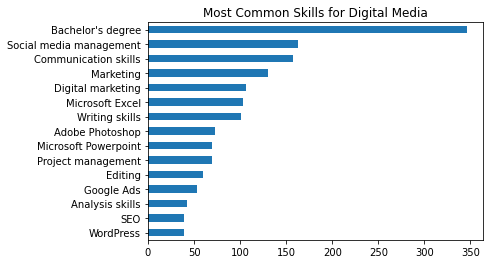

In [303]:
commonPlot(DMDF, 'Digital Media')

### Enterprise Systems

<Axes: title={'center': 'Most Common Skills for Enterprise Systems'}>

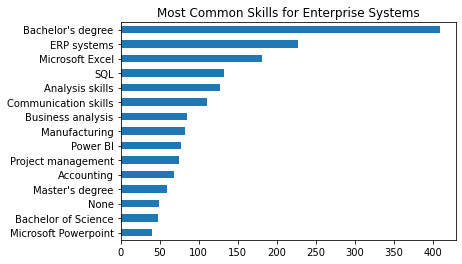

In [304]:
commonPlot(ESDF, 'Enterprise Systems')

### Systems And Security

<Axes: title={'center': 'Most Common Skills for Systems And Security'}>

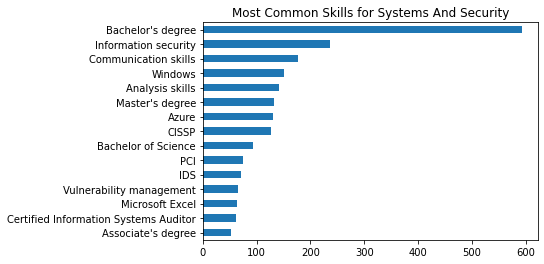

In [305]:
commonPlot(SASDF, 'Systems And Security')

### Software Development

<Axes: title={'center': 'Most Common Skills for Software Development'}>

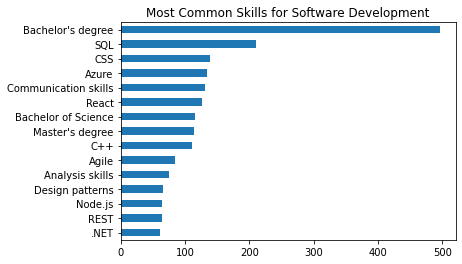

In [306]:
commonPlot(SDDF, 'Software Development')

### Explaination:
The reason why we are not able to graph all the skills is because the number of skills is over 200

In [307]:
#Example
print('The number of unique skills in the Digital Media Dataset is ' + str(to_1D(ctController(DMDF, 'skills')['skills']).nunique()))

The number of unique skills in the Digital Media Dataset is 282


## Part 2: Most Common Groups of Technical Skills (Sam)

In [351]:
import matplotlib.pyplot as plt
def skillGroup(df, title):
  ax = df['technical skills'].value_counts().dropna().sort_values(ascending=False)[:15].sort_values(ascending=True).plot.barh(title = "Top 15 skillsets for " + title)
  ax.set(xlabel='Amount of Times Shown', ylabel='Skillsets')
  plt.show()
  #.plot.barh()
  #return df.groupby(['skills']).count()
  #return df.groupby(['skills'])['skills'].count().copy()
  #df1 = df['skills'].value_counts().copy()
  #return df1.nlargest(10).dropna().sort_values(ascending = True).plot.barh()

### Digital Media

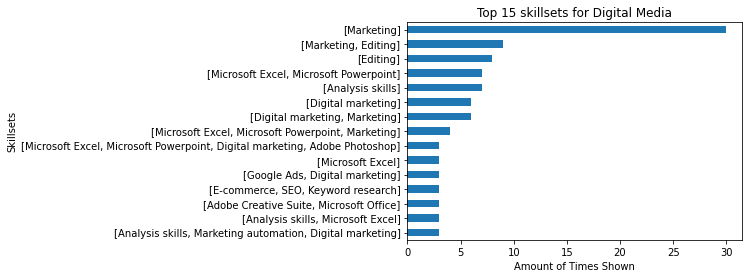

In [352]:
skillGroup(DMDF, "Digital Media")

### Enterprise Systems

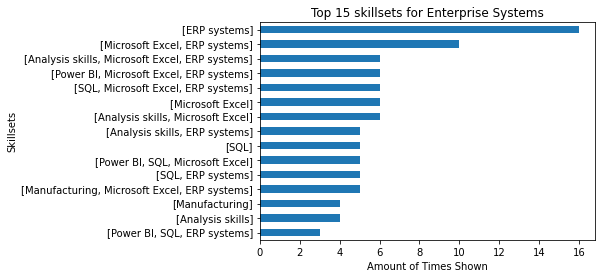

In [353]:
skillGroup(ESDF, "Enterprise Systems")

### Software Development

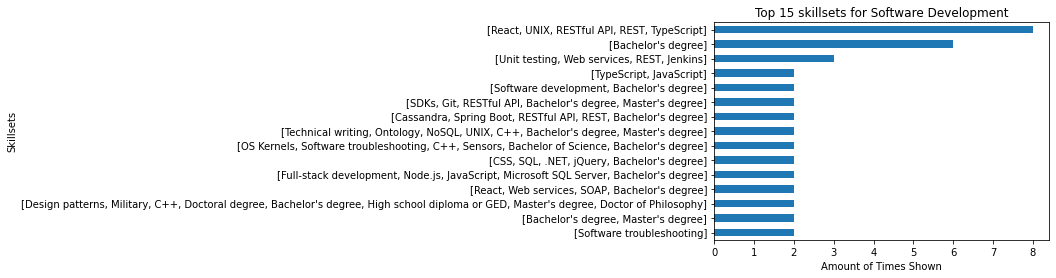

In [354]:
skillGroup(SDDF, "Software Development")

### Systems and Security

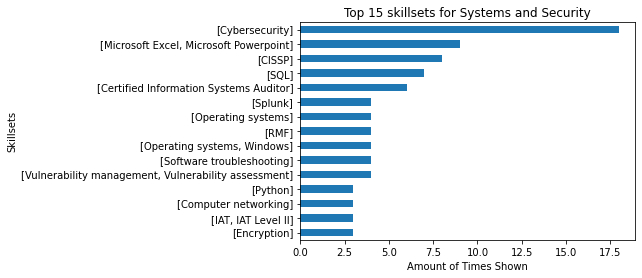

In [355]:
skillGroup(SASDF, "Systems and Security")

# Code for exporting to csv (for development purposes)

## Simply Hired

In [310]:
#Simply Hired
DMsimplyHiredDF.to_csv('DMsimplyHiredDF.csv')
ESsimplyHiredDF.to_csv('ESsimplyHiredDF.csv')
SDsimplyHiredDF.to_csv('SDsimplyHiredDF.csv')
SASsimplyHiredDF.to_csv('SASsimplyHiredDF.csv')

## Indeed

In [311]:
#Indeed
DMIndeedDF.to_csv('DMIndeedDF.csv')
ESIndeedDF.to_csv('ESIndeedDF.csv')
SDIndeedDF.to_csv('SDIndeedDF.csv')
SASIndeedDF.to_csv('SASIndeedDF.csv')

## Full Dataset (list):

In [312]:
DMDF.to_csv('DMDF.csv')
ESDF.to_csv('ESDF.csv')
SDDF.to_csv('SDDF.csv')
SASDF.to_csv('SASDF.csv')

## Full Dataset (list readable):

In [313]:
#DMDF2.to_csv('DMDF2.csv')
#ESDF2.to_csv('ESDF2.csv')
#SDDF2.to_csv('SDDF2.csv')
#SASDF2.to_csv('SASDF2.csv')